In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mpmath as mp
mp.mp.dps = 50 #higher precision
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from plotDensity import *

In [2]:

#Keep having issues with check energy ranges. Currently only using seeds that worked
#Probably issue of having conflicting preruns?
batch_results_8 = []
for seed in range(100, 448):
    res = []
    all_good = True
    try:
        for error in ["I","X","Y","Z"]:
            filename = "../results/periodic/prob_0.107000/X_8_Y_8/seed_%d"%seed+"/error_class_"+error+"/intervals_5_iterations_100000_overlap_0.250000_walkers_8_seed_run_%d"%seed+"_alpha_0.800000_beta_0.0001000000.txt"
            res.append(read_data_from_file(filename))
    except:
        try:
            for error in ["I","X","Y","Z"]:
                filename = "../results/periodic/prob_0.107000/X_8_Y_8/seed_%d"%seed+"/error_class_"+error+"/intervals_3_iterations_100000_overlap_0.250000_walkers_8_seed_run_%d"%seed+"_alpha_0.800000_beta_0.0001000000.txt"
                res.append(read_data_from_file(filename))
        except:
            print('One or more error classes at 8 by 8 had an issue for seed',seed)
            all_good = False
    
    if all_good:
        batch_results_8.append(res)
        
        
batch_results_10 = []
for seed in range(100, 448):
    res = []
    all_good = True
    try:
        for error in ["I","X","Y","Z"]:
            filename = "../results/periodic/prob_0.107000/X_10_Y_10/seed_%d"%seed+"/error_class_"+error+"/intervals_5_iterations_100000_overlap_0.250000_walkers_8_seed_run_%d"%seed+"_alpha_0.800000_beta_0.0001000000.txt"
            res.append(read_data_from_file(filename))
    except:
        try:
            for error in ["I","X","Y","Z"]:
                filename = "../results/periodic/prob_0.107000/X_10_Y_10/seed_%d"%seed+"/error_class_"+error+"/intervals_3_iterations_100000_overlap_0.250000_walkers_8_seed_run_%d"%seed+"_alpha_0.800000_beta_0.0001000000.txt"
                res.append(read_data_from_file(filename))
        except:
            print('One or more error classes at 10 by 10 had an issue for seed',seed)
            all_good = False
    
    if all_good:
        batch_results_10.append(res)      
        
    
#Log sum exp with arbitrary precision
#Gives infinite temperature version of the free energy, for scaling
#Also useful later on
def log_sum_exp(to_sum):  
    maxval = max(to_sum)
    exp_sum = 0
    for value in to_sum:
        exp_sum += mp.exp(value-maxval)
    res = maxval + mp.log(exp_sum)
    return res


def free_energy(E_list, log_g_list,  T):
    #Need to log sum over g(E)*exp(-E/T) without overflow issues   
    to_sum = []
    for i, log_g in enumerate(log_g_list):
        to_sum.append(log_g - E_list[i]/T)
    maxval = max(to_sum)
    exp_sum = 0
    for value in to_sum:
        exp_sum += mp.exp(value-maxval)
    res = maxval + mp.log(exp_sum)
    return -T*res

def get_free_energies(rescaled_results,temperatures):
    free_energies = []
    for seed_results in rescaled_results:
        free_energy_classes = []
        for error_result in seed_results:    
            f_values = []
            for T in temperatures:
                f_values.append(free_energy(error_result[0], error_result[1], T)/(-T))
            free_energy_classes.append(f_values)
        free_energies.append(free_energy_classes)
    return free_energies

    
def process_results(batch_results,X,Y):
    rescaled_results = []
    for seed_results in batch_results:
                
        rescaled_seed_results = []
        for error_result in seed_results:    
                        
            walker_results = error_result
            walker_results = get_renormalized_log_g_values_as_dict_list(walker_results)
            walker_results = average_matching_keys(walker_results)
            results_x = []
            results_y = []
            for result in walker_results:
                results_y.append(np.array(list(result.values())))
                results_x.append(np.array(list(result.keys())))
                
            derivatives_wrt_e = get_derivative_wrt_e(walker_results)
            minimum_deviation_energies = find_lowest_inverse_temp_deviation(derivatives_wrt_e)
            rescale_results_for_concatenation(results_x, results_y, minimum_deviation_energies)
            
            x_max = -1 -2*X*Y
            rescaled_x = []
            rescaled_y = []
            for i in range(len(results_x)):
                for j in range(len(results_x[i])):
                    if results_x[i][j] > x_max: #avoid double counting
                        x_max = results_x[i][j]
                        rescaled_x.append(results_x[i][j])
                        rescaled_y.append(results_y[i][j])

            offset = log_sum_exp(rescaled_y)
            rescaled_y = [res + mp.log(2)*X*Y - offset for res in rescaled_y]
            rescaled_seed_results.append([rescaled_x,rescaled_y])
        rescaled_results.append(rescaled_seed_results)
    return rescaled_results
            
rescaled_results_8 = process_results(batch_results_8,8,8)
rescaled_results_10 = process_results(batch_results_10,10,10)

One or more error classes at 8 by 8 had an issue for seed 123
One or more error classes at 8 by 8 had an issue for seed 129


In [3]:
batch_results_12 = []
for seed in range(100, 400):
    res = []
    all_good = True
    try:
        for error in ["I","X","Y","Z"]:
            filename = "../results/periodic/prob_0.107000/X_12_Y_12/seed_%d"%seed+"/error_class_"+error+"/intervals_20_iterations_100000_overlap_0.250000_walkers_8_seed_run_%d"%seed+"_alpha_0.800000_beta_0.0001000000.txt"
            res.append(read_data_from_file(filename))
    except:
        print('One or more error classes at 12 by 12 had an issue for seed',seed)
        all_good = False
    
    if all_good:
        batch_results_12.append(res)
        

        
batch_results_14 = []
for seed in range(100, 400):
    res = []
    all_good = True
    try:
        for error in ["I","X","Y","Z"]:
            filename = "../results/periodic/prob_0.107000/X_14_Y_14/seed_%d"%seed+"/error_class_"+error+"/intervals_20_iterations_100000_overlap_0.250000_walkers_8_seed_run_%d"%seed+"_alpha_0.800000_beta_0.0001000000.txt"
            res.append(read_data_from_file(filename))
    except:
        print('One or more error classes at 14 by 14 had an issue for seed',seed)
        all_good = False
    
    if all_good:
        batch_results_14.append(res)
        
rescaled_results_12 = process_results(batch_results_12,12,12)
rescaled_results_14 = process_results(batch_results_14,14,14)

One or more error classes at 14 by 14 had an issue for seed 125
One or more error classes at 14 by 14 had an issue for seed 153
One or more error classes at 14 by 14 had an issue for seed 175
One or more error classes at 14 by 14 had an issue for seed 280
One or more error classes at 14 by 14 had an issue for seed 398


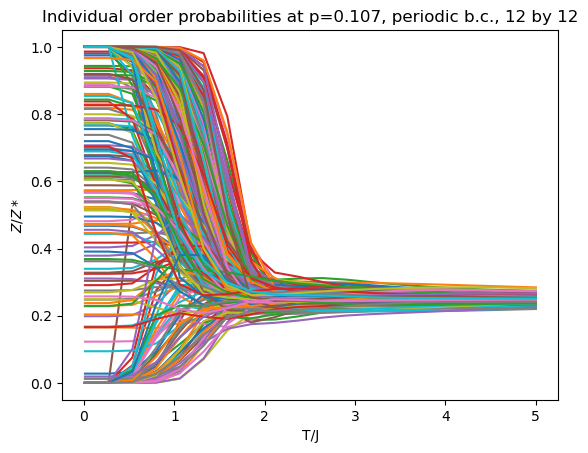

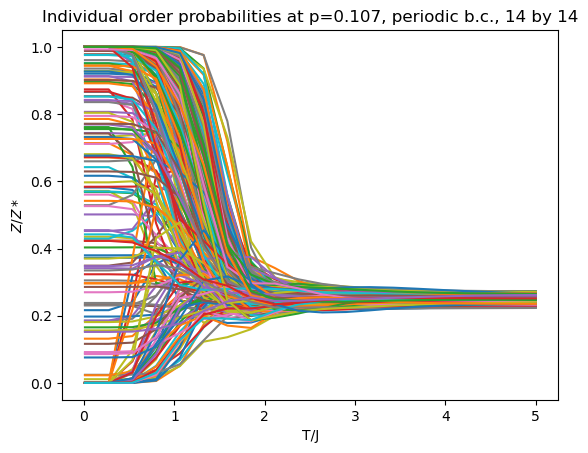

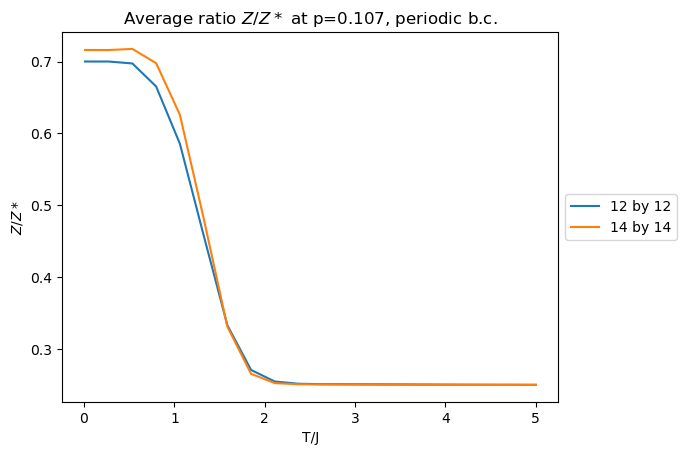

In [4]:
max_temp = 5

temperatures = np.linspace(0.01,max_temp,20)
free_energies_12 = get_free_energies(rescaled_results_12,temperatures)
free_energies_14 = get_free_energies(rescaled_results_14,temperatures)

plt.figure() 
for f_class in free_energies_12:
    plt.plot(temperatures, [1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                              +mp.exp(f_class[2][j] - f_class[0][j])\
                              +mp.exp(f_class[3][j] - f_class[0][j])) \
                            for j in range(len(f_class[0]))])
plt.title("Individual order probabilities at p=0.107, periodic b.c., 12 by 12")
plt.ylabel(r"$Z/Z*$")
plt.xlabel("T/J")
plt.show()

plt.figure() 
for f_class in free_energies_14:
    plt.plot(temperatures, [1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                              +mp.exp(f_class[2][j] - f_class[0][j])\
                              +mp.exp(f_class[3][j] - f_class[0][j])) \
                            for j in range(len(f_class[0]))])
plt.title("Individual order probabilities at p=0.107, periodic b.c., 14 by 14")
plt.ylabel(r"$Z/Z*$")
plt.xlabel("T/J")
plt.show()



plt.figure() 
plt.plot(temperatures,  [  np.sum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_12 ])/len(free_energies_12)  \
                        for j in range(len(f_class[0]))], label="12 by 12")
plt.plot(temperatures,  [  np.sum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_14 ])/len(free_energies_14)  \
                        for j in range(len(f_class[0]))], label="14 by 14")
plt.title(r"Average ratio $Z/Z*$ at p=0.107, periodic b.c.")
plt.ylabel(r"$Z/Z*$")
plt.xlabel("T/J")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

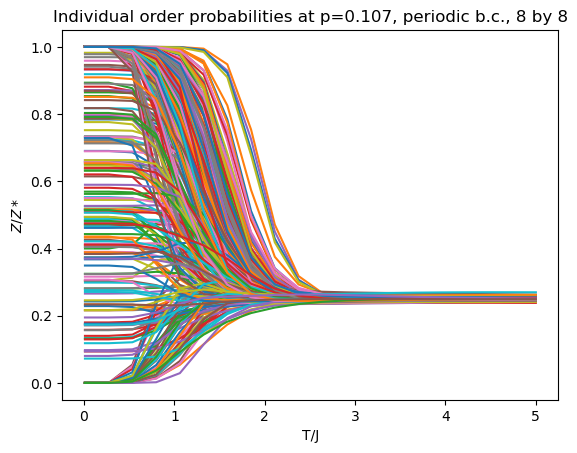

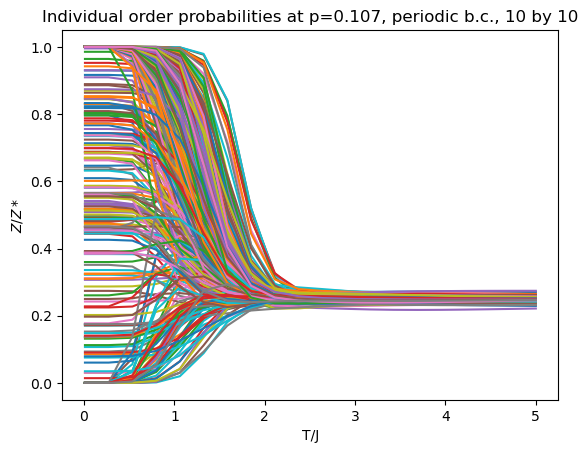

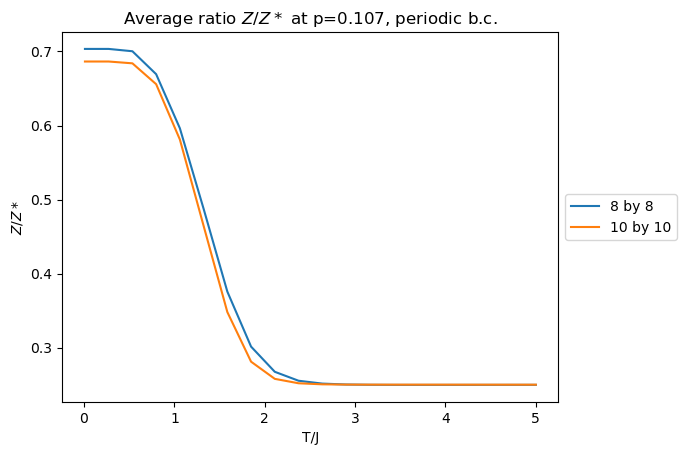

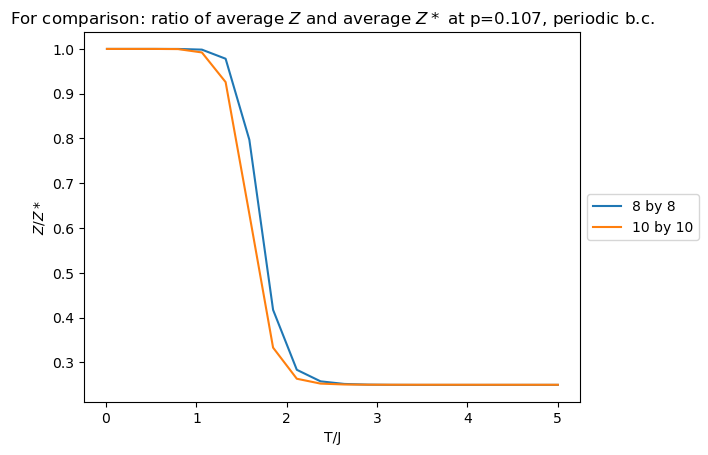

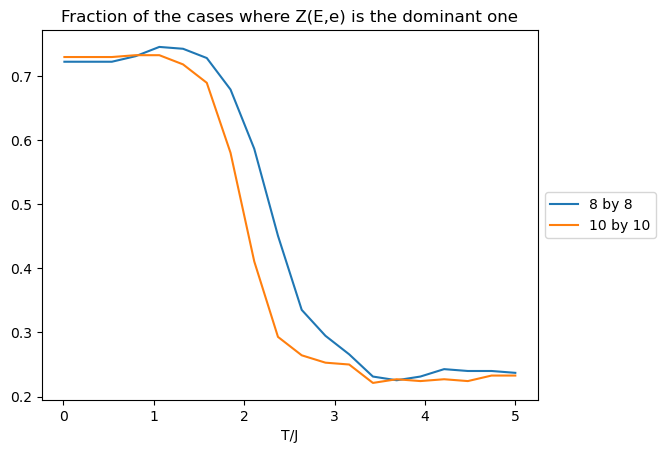

In [5]:
temperatures = np.linspace(0.01,max_temp,20)
free_energies_8 = get_free_energies(rescaled_results_8,temperatures)
free_energies_10 = get_free_energies(rescaled_results_10,temperatures)

plt.figure() 
for f_class in free_energies_8:
    plt.plot(temperatures, [1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                              +mp.exp(f_class[2][j] - f_class[0][j])\
                              +mp.exp(f_class[3][j] - f_class[0][j])) \
                            for j in range(len(f_class[0]))])
plt.title("Individual order probabilities at p=0.107, periodic b.c., 8 by 8")
plt.ylabel(r"$Z/Z*$")
plt.xlabel("T/J")
plt.show()

plt.figure() 
for f_class in free_energies_10:
    plt.plot(temperatures, [1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                              +mp.exp(f_class[2][j] - f_class[0][j])\
                              +mp.exp(f_class[3][j] - f_class[0][j])) \
                            for j in range(len(f_class[0]))])
plt.title("Individual order probabilities at p=0.107, periodic b.c., 10 by 10")
plt.ylabel(r"$Z/Z*$")
plt.xlabel("T/J")
plt.show()


####################
# We check the average of the ratio of Z

plt.figure() 
plt.plot(temperatures,  [  np.sum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_8 ])/len(free_energies_8)  \
                        for j in range(len(f_class[0]))], label="8 by 8")
plt.plot(temperatures,  [  np.sum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_10 ])/len(free_energies_10)  \
                        for j in range(len(f_class[0]))], label="10 by 10")
plt.title(r"Average ratio $Z/Z*$ at p=0.107, periodic b.c.")
plt.ylabel(r"$Z/Z*$")
plt.xlabel("T/J")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


#We also want to check the order probability of the average, ie ratio of average Z

plt.figure()

f_class = free_energies_8[0]

average_I = [log_sum_exp([f_class[0][j] for f_class in free_energies_8])  for j in range(len(f_class[0]))]
average_X = [log_sum_exp([f_class[1][j] for f_class in free_energies_8])  for j in range(len(f_class[0]))]
average_Y = [log_sum_exp([f_class[2][j] for f_class in free_energies_8])  for j in range(len(f_class[0]))]
average_Z = [log_sum_exp([f_class[3][j] for f_class in free_energies_8])  for j in range(len(f_class[0]))]
average_all = [log_sum_exp([average_I[j],average_X[j],average_Y[j],average_Z[j]]) for j in range(len(average_I))]

plt.plot(temperatures, [mp.exp(average_I[j] - average_all[j]) for j in range(len(average_I))],label="8 by 8")


f_class = free_energies_10[0]

average_I = [log_sum_exp([f_class[0][j] for f_class in free_energies_10])  for j in range(len(f_class[0]))]
average_X = [log_sum_exp([f_class[1][j] for f_class in free_energies_10])  for j in range(len(f_class[0]))]
average_Y = [log_sum_exp([f_class[2][j] for f_class in free_energies_10])  for j in range(len(f_class[0]))]
average_Z = [log_sum_exp([f_class[3][j] for f_class in free_energies_10])  for j in range(len(f_class[0]))]
average_all = [log_sum_exp([average_I[j],average_X[j],average_Y[j],average_Z[j]]) for j in range(len(average_I))]

plt.plot(temperatures, [mp.exp(average_I[j] - average_all[j]) for j in range(len(average_I))],label="10 by 10")

plt.title(r"For comparison: ratio of average $Z$ and average $Z*$ at p=0.107, periodic b.c.")
plt.ylabel(r"$Z/Z*$")
plt.xlabel("T/J")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


############
#For comparison, we also count how often any individual ratio is off.

plt.figure()
plt.plot(temperatures, [1 - sum([f_class[0][j] < f_class[1][j]\
           or f_class[0][j] < f_class[2][j]\
           or f_class[0][j] < f_class[3][j] for f_class in free_energies_8])/(len(free_energies_8))\
                        for j in range(len(f_class[0])) ] , label = "8 by 8")
plt.plot(temperatures, [1 - sum([f_class[0][j] < f_class[1][j]\
           or f_class[0][j] < f_class[2][j]\
           or f_class[0][j] < f_class[3][j] for f_class in free_energies_10])/(len(free_energies_10))\
                        for j in range(len(f_class[0])) ] , label = "10 by 10")
plt.title("Fraction of the cases where Z(E,e) is the dominant one")
plt.xlabel("T/J")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


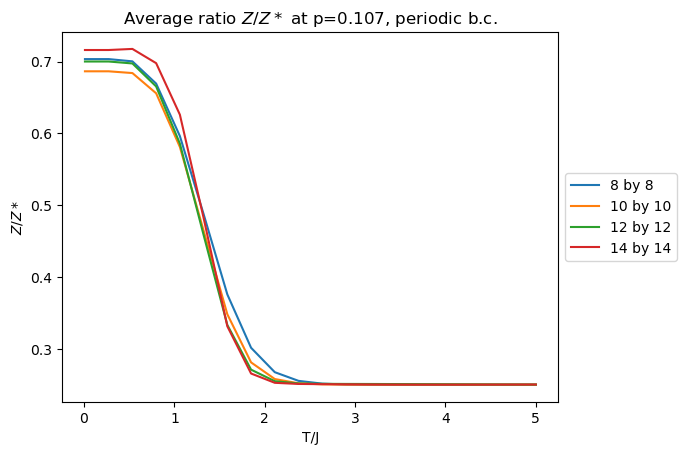

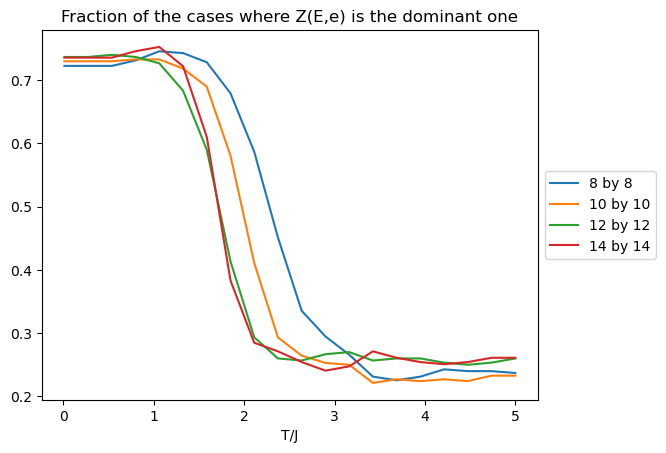

In [6]:
plt.figure() 
plt.plot(temperatures,  [  np.sum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_8 ])/len(free_energies_8)  \
                        for j in range(len(f_class[0]))], label="8 by 8")
plt.plot(temperatures,  [  np.sum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_10 ])/len(free_energies_10)  \
                        for j in range(len(f_class[0]))], label="10 by 10")
plt.plot(temperatures,  [  np.sum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_12 ])/len(free_energies_12)  \
                        for j in range(len(f_class[0]))], label="12 by 12")
plt.plot(temperatures,  [  np.sum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_14 ])/len(free_energies_14)  \
                        for j in range(len(f_class[0]))], label="14 by 14")
plt.title(r"Average ratio $Z/Z*$ at p=0.107, periodic b.c.")
plt.ylabel(r"$Z/Z*$")
plt.xlabel("T/J")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



plt.figure()
plt.plot(temperatures, [1 - sum([f_class[0][j] < f_class[1][j]\
           or f_class[0][j] < f_class[2][j]\
           or f_class[0][j] < f_class[3][j] for f_class in free_energies_8])/(len(free_energies_8))\
                        for j in range(len(f_class[0])) ] , label = "8 by 8")
plt.plot(temperatures, [1 - sum([f_class[0][j] < f_class[1][j]\
           or f_class[0][j] < f_class[2][j]\
           or f_class[0][j] < f_class[3][j] for f_class in free_energies_10])/(len(free_energies_10))\
                        for j in range(len(f_class[0])) ] , label = "10 by 10")
plt.plot(temperatures, [1 - sum([f_class[0][j] < f_class[1][j]\
           or f_class[0][j] < f_class[2][j]\
           or f_class[0][j] < f_class[3][j] for f_class in free_energies_12])/(len(free_energies_12))\
                        for j in range(len(f_class[0])) ] , label = "12 by 12")
plt.plot(temperatures, [1 - sum([f_class[0][j] < f_class[1][j]\
           or f_class[0][j] < f_class[2][j]\
           or f_class[0][j] < f_class[3][j] for f_class in free_energies_14])/(len(free_energies_14))\
                        for j in range(len(f_class[0])) ] , label = "14 by 14")


plt.title("Fraction of the cases where Z(E,e) is the dominant one")
plt.xlabel("T/J")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [7]:
#For now, take a rough value for the Nishimori temp just by eye -- for this p, it should be around 0.95
j_Nish = 0
min_so_far = 1
for j, temp in enumerate(temperatures):
    #print(j, abs(temp-0.95))
    if abs(temp-0.95)<min_so_far:
        j_Nish = j
    min_so_far = abs(temp-0.95)

print(j_Nish, abs(temperatures[j_Nish]-0.95))

4 0.1105263157894738


In [ ]:
#Done for each f_class (meaning for each seed). Then we average later, when plotting

#In the ratios we do not use j but rather j_Nish,
#with j_Nish being whichever index gets us the Nishimori temperature
#(later, we should compute exactly at the Nishimori point to compare)


#This should in general not agree with the Preskill method away from the Nishimori line
def fractions(f_class):
    res = []
    
    for j in range(len(f_class[0])):
        
        #If condition determines if we are in the equivalence class the dedcoder chooses            
        if f_class[0][j]>f_class[1][j] and f_class[0][j]>f_class[2][j] and f_class[0][j]>f_class[3][j]:
            
            
            result = (1/(1+ mp.exp(f_class[1][j_Nish] - f_class[0][j_Nish])\
                          +mp.exp(f_class[2][j_Nish] - f_class[0][j_Nish])\
                          +mp.exp(f_class[3][j_Nish] - f_class[0][j_Nish])))
        else:
            result = (-(mp.exp(f_class[1][j_Nish] - f_class[0][j_Nish])\
                          +mp.exp(f_class[2][j_Nish] - f_class[0][j_Nish])\
                          +mp.exp(f_class[3][j_Nish] - f_class[0][j_Nish]))
                      /(1 + mp.exp(f_class[1][j_Nish] - f_class[0][j_Nish])\
                          +mp.exp(f_class[2][j_Nish] - f_class[0][j_Nish])\
                          +mp.exp(f_class[3][j_Nish] - f_class[0][j_Nish])))
        res.append(result)
    return res



def fractions_new(f_class):
    res = []
    
    for j in range(len(f_class[0])):
    
        #Decoder picks a class based on temperature j
        classes = [f_class[0][j],f_class[1][j],f_class[2][j],f_class[3][j]]

        i_max = classes.index(max(classes))

        #We find the likelihood of actually being in that class (Makes sense only for Nishimori)
        result = (1/(mp.exp(f_class[0][j_Nish] - f_class[i_max][j_Nish])\
                      + mp.exp(f_class[1][j_Nish] - f_class[i_max][j_Nish])\
                      +mp.exp(f_class[2][j_Nish] - f_class[i_max][j_Nish])\
                      +mp.exp(f_class[3][j_Nish] - f_class[i_max][j_Nish])))

        res.append(result)
    return res





def fraction_new(f_class):
    
    #Decoder picks a class based on temperature j
    classes = [f_class[0][j],f_class[1][j],f_class[2][j],f_class[3][j]]

    i_max = classes.index(max(classes))

    #We find the likelihood of actually being in that class (Makes sense only for Nishimori)
    result = (1/(mp.exp(f_class[0][j_Nish] - f_class[i_max][j_Nish])\
                  + mp.exp(f_class[1][j_Nish] - f_class[i_max][j_Nish])\
                  +mp.exp(f_class[2][j_Nish] - f_class[i_max][j_Nish])\
                  +mp.exp(f_class[3][j_Nish] - f_class[i_max][j_Nish])))

    
    return result



temperatures = np.linspace(0.01,max_temp,20)

plt.figure() 
plt.plot(temperatures,  [ 0.5 + 0.5 * np.sum([ fractions(f_class)[j]
                                   for f_class in free_energies_8 ])/len(free_energies_8)  \
                        for j in range(len(f_class[0]))], label="8 by 8")

plt.plot(temperatures,  [ 0.5 + 0.5 * np.sum([ fractions(f_class)[j]
                                   for f_class in free_energies_10 ])/len(free_energies_10)  \
                        for j in range(len(f_class[0]))], label="10 by 10")

plt.plot(temperatures,  [ 0.5 + 0.5 * np.sum([ fractions(f_class)[j]
                                   for f_class in free_energies_12 ])/len(free_energies_12)  \
                        for j in range(len(f_class[0]))], label="12 by 12")

plt.plot(temperatures,  [ 0.5 + 0.5 * np.sum([ fractions(f_class)[j]
                                   for f_class in free_energies_14 ])/len(free_energies_14)  \
                        for j in range(len(f_class[0]))], label="14 by 14")


plt.title("Test of conditioned ratio")
plt.xlabel("T/J")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


#Test of conditioned ratio 2 -- this one should *definitely* not work outside of
#the Nishimori line, it would just give the same result (in most cases) as on the line
plt.figure() 
plt.plot(temperatures,  [mp.fsum([ fractions_new(f_class)[j]
                                   for f_class in free_energies_8 ])/len(free_energies_8)  \
                        for j in range(len(f_class[0]))], label="8 by 8")

plt.plot(temperatures,  [mp.fsum([ fractions_new(f_class)[j]
                                   for f_class in free_energies_10 ])/len(free_energies_10)  \
                        for j in range(len(f_class[0]))], label="10 by 10")

plt.plot(temperatures,  [mp.fsum([ fractions_new(f_class)[j]
                                   for f_class in free_energies_12 ])/len(free_energies_12)  \
                        for j in range(len(f_class[0]))], label="12 by 12")

plt.plot(temperatures,  [mp.fsum([ fractions_new(f_class)[j]
                                   for f_class in free_energies_14 ])/len(free_energies_14)  \
                        for j in range(len(f_class[0]))], label="14 by 14")


plt.title("Test of conditioned ratio 2")
plt.xlabel("T/J")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



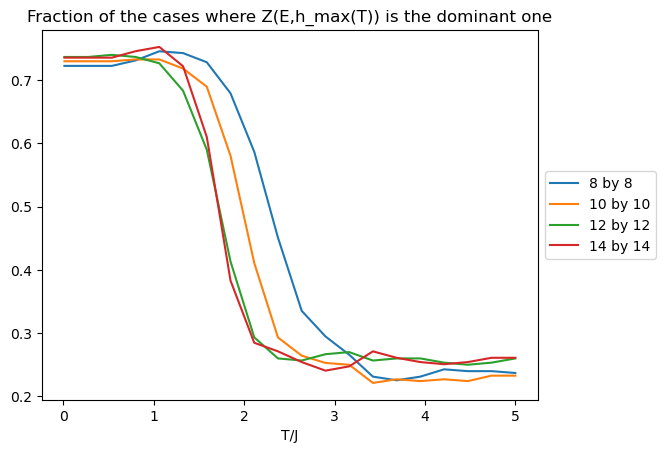

In [11]:

def is_0_dominant(f_class, j):
    
    #Decoder picks a class based on temperature j
    classes = [f_class[0][j],f_class[1][j],f_class[2][j],f_class[3][j]]

    i_max = classes.index(max(classes))
    
    result = 0
    
    if i_max == 0:
        result = 1
    
    return result




plt.figure()
plt.plot(temperatures,  [mp.fsum([ is_0_dominant(f_class, j)
                                   for f_class in free_energies_8 ])/len(free_energies_8)  \
                        for j in range(len(f_class[0]))], label="8 by 8")

plt.plot(temperatures,  [mp.fsum([ is_0_dominant(f_class, j)
                                   for f_class in free_energies_10 ])/len(free_energies_10)  \
                        for j in range(len(f_class[0]))], label="10 by 10")

plt.plot(temperatures,  [mp.fsum([ is_0_dominant(f_class, j)
                                   for f_class in free_energies_12 ])/len(free_energies_12)  \
                        for j in range(len(f_class[0]))], label="12 by 12")

plt.plot(temperatures,  [mp.fsum([ is_0_dominant(f_class, j)
                                   for f_class in free_energies_14 ])/len(free_energies_14)  \
                        for j in range(len(f_class[0]))], label="14 by 14")

plt.title("Fraction of the cases where Z(E,h_max(T)) is the dominant one")
plt.xlabel("T/J")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



In [9]:
#sanity check that math is mathing, i.,e. that the Z(E,e) dominant curve should also go to 1/4
randvals = np.random.rand(1000000,4)
print(sum([randvals[i][0]>randvals[i][1] or randvals[i][0]>randvals[i][2] or randvals[i][0]>randvals[i][3]\
           for i in range(len(randvals))])/len(randvals))
print(sum([randvals[i][0]<randvals[i][1] and randvals[i][0]<randvals[i][2] and randvals[i][0]<randvals[i][3]\
           for i in range(len(randvals))])/len(randvals))

print(1/(1+1+1+1))


#Next, if trivial class is twice as likely as the other, what do we get?
print(sum([2*randvals[i][0]>randvals[i][1] or 2*randvals[i][0]>randvals[i][2] or 2*randvals[i][0]>randvals[i][3]\
           for i in range(len(randvals))])/len(randvals))
print(sum([2*randvals[i][0]<randvals[i][1] and 2*randvals[i][0]<randvals[i][2] and 2*randvals[i][0]<randvals[i][3]\
           for i in range(len(randvals))])/len(randvals))

print(2/(2+1+1+1))


print('\n')


#sanity check that math is mathing, i.,e. that the Z(E,e) dominant curve should also go to 1/4
randvals = np.random.rand(10000000,2)
print(sum([randvals[i][0]>randvals[i][1] \
           for i in range(len(randvals))])/len(randvals))
print(sum([randvals[i][0]<randvals[i][1] \
           for i in range(len(randvals))])/len(randvals))

print(1/(1+1))


#Next, if trivial class is twice as likely as the other, what do we get?
print(sum([2*randvals[i][0]>randvals[i][1]\
           for i in range(len(randvals))])/len(randvals))
print(sum([2*randvals[i][0]<randvals[i][1]\
           for i in range(len(randvals))])/len(randvals))

print(2/(2+1))

print(sum([2*randvals[i][0]/(2*randvals[i][0] + randvals[i][1])\
           for i in range(len(randvals))])/len(randvals))

print(sum([randvals[i][1]/(2*randvals[i][0] + randvals[i][1])\
           for i in range(len(randvals))])/len(randvals))


print(sum([2*randvals[i][0] for i in range(len(randvals))])/sum([2*randvals[i][0]+randvals[i][1] for i in range(len(randvals))]) )

print(sum([randvals[i][1] for i in range(len(randvals))])/sum([2*randvals[i][0]+randvals[i][1] for i in range(len(randvals))]) )

0.749778
0.250222
0.25
0.874977
0.125023
0.4


0.4998853
0.5001147
0.5
0.749824
0.250176
0.6666666666666666
0.6306901709373767
0.36930982906269033
0.6665818775293433
0.3334181224705698


In [10]:
print(7*4*20/60)

#at 4:33: seed 128 for probability 0.
#at 5:25: seed 133, but had been stuck for a while probably.

9.333333333333334


In [11]:
for p in [0,0.02,0.04,0.06,0.08,0.1,0.12]:
    if p == 0:
        T_Nish = 1e-10 #avoid zero division
    else:
        T_Nish = 1/(mp.log((1-p)/p)/2)        
    print(T_Nish)

1e-10
0.51389834236975069304464938937018938665133916493216
0.62931596088824973365382784631385377240273830912679
0.72686692063163383541493662124620866646563046511383
0.81888444641023926992160943541946879123780400080343
0.91023922662683739361424016573610700061263605725521
1.0037992976837764127490265141214035789920569696676


# Looking at a range of probabilities, and comparing to pymatching

In [12]:
from PyMatching import *

num_shots = 200000
Ls = [4,6]
ps = np.linspace(0.01, 0.12, 12)
np.random.seed(2)
log_errors_all_L = []
for L in Ls:
    print("Simulating L={}...".format(L))
    Hx = toric_code_x_stabilisers(L)
    logX = toric_code_x_logicals(L)
    log_errors = []
    for error_probability in ps:
        num_errors = num_decoding_failures_vectorised(Hx, logX, error_probability, num_shots)
        log_errors.append(num_errors/num_shots)
    log_errors_all_L.append(np.array(log_errors))

Simulating L=4...
Simulating L=6...


In [13]:
batch_results = []

probabilities = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12]

#probabilities = [0.01,0.12]

for p in probabilities:
    
    print('Probability',p)
    
    
    seed_range = range(100,651)
    
    
    
    if p in [0.12]:
        seed_range = range(100,501)    
    
    
    #Taking more shots at low p        
    if p in [0.03]:
        seed_range = list(range(100,651)) + list(range(801,920)) 
        
    if p in [0.01,0.02]:
        seed_range = range(100,1501)
 


    
    seed_range = list(seed_range)+list(range(2000,2265))

        
    new_run = True
    if new_run:
        seed_range = range(100,3600)
        
        
        #seed_range = range(100,600)
    
    
        
    batch_res_4 = []

    for seed in seed_range:
        
        if new_run:
            seed1 = 100
            if seed >= 200:
                seed1 = 200
            if seed >= 400:
                seed1 = 400
            if seed >= 500:
                seed1 = 500
                
                
            seed1 = 0
            
        res = []
        all_good = True

        try:
            for error in ["I","X","Y","Z"]:
                filename = "../results/periodic/prob_%6f"%p+"/X_4_Y_4/seed_%d"%seed+"/error_class_"+error+"/intervals_10_iterations_10000_overlap_0.250000_walkers_8_seed_run_%d"%seed+"_alpha_0.800000_beta_0.0001000000.txt"
                
                if new_run:
                    filename = "../results/periodic/prob_%6f"%p+"/X_4_Y_4/seed_%d"%seed+"/error_class_"+error+"/intervals_10_iterations_10000_overlap_0.250000_walkers_8_seed_run_%d"%seed1+"_alpha_0.800000_beta_0.0000010000exchange_offset1.txt"

                    if seed >= 400:
                        filename = "../results/periodic/prob_%6f"%p+"/X_4_Y_4/seed_%d"%seed+"/error_class_"+error+"/intervals_10_iterations_1000_overlap_0.250000_walkers_8_seed_run_%d"%seed1+"_alpha_0.800000_beta_0.0000010000exchange_offset1.txt"
                    if seed >= 600:
                        filename = "../results/periodic/prob_%6f"%p+"/X_4_Y_4/seed_%d"%seed+"/error_class_"+error+"/intervals_10_iterations_1000_overlap_0.250000_walkers_8_seed_run_0_alpha_0.800000_beta_0.0000010000exchange_offset4.txt"

                    filename = "../results/periodic/prob_%6f"%p+"/X_4_Y_4/seed_%d"%seed+"/error_class_"+error+"/intervals_10_iterations_1000_overlap_0.250000_walkers_8_seed_run_0_alpha_0.800000_beta_0.0000010000exchange_offset4.txt"

                res.append(read_data_from_file(filename))
        except:
            print('One or more error classes at 4 by 4 had an issue for seed',seed,'at probability',p)
            all_good = False

        if all_good:
            batch_res_4.append(res)
    
    batch_res_6 = []
    for seed in seed_range:
        
        if new_run:
            seed1 = 100
            if seed >= 200:
                seed1 = 200
            if seed >= 400:
                seed1 = 400
            if seed >= 500:
                seed1 = 500
        res = []
        all_good = True

        try:
            for error in ["I","X","Y","Z"]:
                filename = "../results/periodic/prob_%6f"%p+"/X_6_Y_6/seed_%d"%seed+"/error_class_"+error+"/intervals_10_iterations_10000_overlap_0.250000_walkers_8_seed_run_%d"%seed+"_alpha_0.800000_beta_0.0001000000.txt"
                
                if new_run:
                    filename = "../results/periodic/prob_%6f"%p+"/X_6_Y_6/seed_%d"%seed+"/error_class_"+error+"/intervals_10_iterations_10000_overlap_0.250000_walkers_8_seed_run_%d"%seed1+"_alpha_0.800000_beta_0.0000010000exchange_offset1.txt"

                    if seed >= 400:
                        filename = "../results/periodic/prob_%6f"%p+"/X_6_Y_6/seed_%d"%seed+"/error_class_"+error+"/intervals_10_iterations_1000_overlap_0.250000_walkers_8_seed_run_%d"%seed1+"_alpha_0.800000_beta_0.0000010000exchange_offset1.txt"
                    if seed >= 600:
                        filename = "../results/periodic/prob_%6f"%p+"/X_6_Y_6/seed_%d"%seed+"/error_class_"+error+"/intervals_10_iterations_1000_overlap_0.250000_walkers_8_seed_run_0_alpha_0.800000_beta_0.0000010000exchange_offset4.txt"

                    filename = "../results/periodic/prob_%6f"%p+"/X_6_Y_6/seed_%d"%seed+"/error_class_"+error+"/intervals_10_iterations_1000_overlap_0.250000_walkers_8_seed_run_0_alpha_0.800000_beta_0.0000010000exchange_offset4.txt"

                        
                res.append(read_data_from_file(filename))
        except:
            print('One or more error classes at 6 by 6 had an issue for seed',seed,'at probability',p)
            all_good = False

        if all_good:
            batch_res_6.append(res)
            

    print('Adding to results for probability',p)
    print('Number of seeds:', len(batch_res_4), len(batch_res_6))
    rescaled_res_4 = process_results(batch_res_4,4,4)
    rescaled_res_6 = process_results(batch_res_6,6,6)
    batch_results.append([rescaled_res_4,rescaled_res_6])

Probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3100 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3101 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3102 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3103 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3104 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3105 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3106 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3107 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3108 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3109 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3110 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3111 at prob

One or more error classes at 6 by 6 had an issue for seed 3204 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3205 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3206 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3207 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3208 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3209 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3210 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3211 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3212 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3213 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3214 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3215 at probability 0.01
One 

One or more error classes at 6 by 6 had an issue for seed 3312 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3313 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3314 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3315 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3316 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3317 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3318 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3319 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3320 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3321 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3322 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3323 at probability 0.01
One 

One or more error classes at 6 by 6 had an issue for seed 3428 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3429 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3430 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3431 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3432 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3433 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3434 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3435 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3436 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3437 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3438 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3439 at probability 0.01
One 

One or more error classes at 6 by 6 had an issue for seed 3548 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3549 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3550 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3551 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3552 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3553 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3554 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3555 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3556 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3557 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3558 at probability 0.01
One or more error classes at 6 by 6 had an issue for seed 3559 at probability 0.01
One 

One or more error classes at 6 by 6 had an issue for seed 1156 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1157 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1158 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1159 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1160 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1161 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1162 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1163 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1164 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1165 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1166 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1167 at probability 0.02
One 

One or more error classes at 6 by 6 had an issue for seed 1259 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1260 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1261 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1262 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1263 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1264 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1265 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1266 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1267 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1268 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1269 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1270 at probability 0.02
One 

One or more error classes at 6 by 6 had an issue for seed 1358 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1359 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1360 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1361 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1362 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1363 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1364 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1365 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1366 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1367 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1368 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1369 at probability 0.02
One 

One or more error classes at 6 by 6 had an issue for seed 1497 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1498 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1499 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1500 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1501 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1502 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1503 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1504 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1505 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1506 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1507 at probability 0.02
One or more error classes at 6 by 6 had an issue for seed 1508 at probability 0.02
One 

Adding to results for probability 0.02
Number of seeds: 3500 3000
Probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3100 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3101 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3102 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3103 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3104 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3105 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3106 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3107 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3108 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3109 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3110 at probability 0.03
One 

One or more error classes at 6 by 6 had an issue for seed 3206 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3207 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3208 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3209 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3210 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3211 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3212 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3213 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3214 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3215 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3216 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3217 at probability 0.03
One 

One or more error classes at 6 by 6 had an issue for seed 3318 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3319 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3320 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3321 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3322 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3323 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3324 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3325 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3326 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3327 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3328 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3329 at probability 0.03
One 

One or more error classes at 6 by 6 had an issue for seed 3422 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3423 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3424 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3425 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3426 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3427 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3428 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3429 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3430 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3431 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3432 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3433 at probability 0.03
One 

One or more error classes at 6 by 6 had an issue for seed 3523 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3524 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3525 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3526 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3527 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3528 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3529 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3530 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3531 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3532 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3533 at probability 0.03
One or more error classes at 6 by 6 had an issue for seed 3534 at probability 0.03
One 

One or more error classes at 6 by 6 had an issue for seed 153 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 154 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 155 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 156 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 157 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 158 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 159 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 160 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 161 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 162 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 163 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 164 at probability 0.05
One or more erro

One or more error classes at 6 by 6 had an issue for seed 260 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 261 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 262 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 263 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 264 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 265 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 266 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 267 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 268 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 269 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 270 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 271 at probability 0.05
One or more erro

One or more error classes at 6 by 6 had an issue for seed 364 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 365 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 366 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 367 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 368 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 369 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 370 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 371 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 372 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 373 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 374 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 375 at probability 0.05
One or more erro

One or more error classes at 6 by 6 had an issue for seed 475 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 476 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 477 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 478 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 479 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 480 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 481 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 482 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 483 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 484 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 485 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 486 at probability 0.05
One or more erro

One or more error classes at 6 by 6 had an issue for seed 581 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 582 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 583 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 584 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 585 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 586 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 587 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 588 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 589 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 590 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 591 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 592 at probability 0.05
One or more erro

One or more error classes at 6 by 6 had an issue for seed 683 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 684 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 685 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 686 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 687 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 688 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 689 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 690 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 691 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 692 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 693 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 694 at probability 0.05
One or more erro

One or more error classes at 6 by 6 had an issue for seed 819 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 820 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 821 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 822 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 823 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 824 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 825 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 826 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 827 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 828 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 829 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 830 at probability 0.05
One or more erro

One or more error classes at 6 by 6 had an issue for seed 923 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 924 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 925 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 926 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 927 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 928 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 929 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 930 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 931 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 932 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 933 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 934 at probability 0.05
One or more erro

One or more error classes at 6 by 6 had an issue for seed 1026 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 1027 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 1028 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 1029 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 1030 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 1031 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 1032 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 1033 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 1034 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 1035 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 1036 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 1037 at probability 0.05
One 

One or more error classes at 6 by 6 had an issue for seed 2145 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2146 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2147 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2148 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2149 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2150 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2151 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2152 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2153 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2154 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2155 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2156 at probability 0.05
One 

One or more error classes at 6 by 6 had an issue for seed 2248 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2249 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2250 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2251 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2252 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2253 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2254 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2255 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2256 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2257 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2258 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2259 at probability 0.05
One 

One or more error classes at 6 by 6 had an issue for seed 2380 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2381 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2382 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2383 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2384 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2385 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2386 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2387 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2388 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2389 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2390 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2391 at probability 0.05
One 

One or more error classes at 6 by 6 had an issue for seed 2497 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2498 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2499 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2500 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2501 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2502 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2503 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2504 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2505 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2506 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2507 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2508 at probability 0.05
One 

One or more error classes at 6 by 6 had an issue for seed 2625 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2626 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2627 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2628 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2629 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2630 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2631 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2632 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2633 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2634 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2635 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2636 at probability 0.05
One 

One or more error classes at 6 by 6 had an issue for seed 2749 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2750 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2751 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2752 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2753 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2754 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2755 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2756 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2757 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2758 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2759 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2760 at probability 0.05
One 

One or more error classes at 6 by 6 had an issue for seed 2851 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2852 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2853 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2854 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2855 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2856 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2857 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2858 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2859 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2860 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2861 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2862 at probability 0.05
One 

One or more error classes at 6 by 6 had an issue for seed 2953 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2954 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2955 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2956 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2957 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2958 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2959 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2960 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2961 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2962 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2963 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 2964 at probability 0.05
One 

One or more error classes at 6 by 6 had an issue for seed 3057 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3058 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3059 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3060 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3061 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3062 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3063 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3064 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3065 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3066 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3067 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3068 at probability 0.05
One 

One or more error classes at 6 by 6 had an issue for seed 3162 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3163 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3164 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3165 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3166 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3167 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3168 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3169 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3170 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3171 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3172 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3173 at probability 0.05
One 

One or more error classes at 6 by 6 had an issue for seed 3298 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3299 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3300 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3301 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3302 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3303 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3304 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3305 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3306 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3307 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3308 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3309 at probability 0.05
One 

One or more error classes at 6 by 6 had an issue for seed 3401 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3402 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3403 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3404 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3405 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3406 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3407 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3408 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3409 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3410 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3411 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3412 at probability 0.05
One 

One or more error classes at 6 by 6 had an issue for seed 3508 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3509 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3510 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3511 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3512 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3513 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3514 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3515 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3516 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3517 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3518 at probability 0.05
One or more error classes at 6 by 6 had an issue for seed 3519 at probability 0.05
One 

One or more error classes at 6 by 6 had an issue for seed 1648 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1649 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1650 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1651 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1652 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1653 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1654 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1655 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1656 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1657 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1658 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1659 at probability 0.06
One 

One or more error classes at 6 by 6 had an issue for seed 1789 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1790 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1791 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1792 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1793 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1794 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1795 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1796 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1797 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1798 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1799 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1800 at probability 0.06
One 

One or more error classes at 6 by 6 had an issue for seed 1899 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1900 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1901 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1902 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1903 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1904 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1905 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1906 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1907 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1908 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1909 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 1910 at probability 0.06
One 

One or more error classes at 6 by 6 had an issue for seed 2038 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2039 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2040 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2041 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2042 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2043 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2044 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2045 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2046 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2047 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2048 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2049 at probability 0.06
One 

One or more error classes at 6 by 6 had an issue for seed 2158 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2159 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2160 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2161 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2162 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2163 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2164 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2165 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2166 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2167 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2168 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2169 at probability 0.06
One 

One or more error classes at 6 by 6 had an issue for seed 2286 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2287 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2288 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2289 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2290 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2291 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2292 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2293 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2294 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2295 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2296 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2297 at probability 0.06
One 

One or more error classes at 6 by 6 had an issue for seed 2389 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2390 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2391 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2392 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2393 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2394 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2395 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2396 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2397 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2398 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2399 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2400 at probability 0.06
One 

One or more error classes at 6 by 6 had an issue for seed 2519 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2520 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2521 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2522 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2523 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2524 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2525 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2526 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2527 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2528 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2529 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 2530 at probability 0.06
One 

One or more error classes at 6 by 6 had an issue for seed 3152 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3153 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3154 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3155 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3156 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3157 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3158 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3159 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3160 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3161 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3162 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3163 at probability 0.06
One 

One or more error classes at 6 by 6 had an issue for seed 3285 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3286 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3287 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3288 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3289 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3290 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3291 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3292 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3293 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3294 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3295 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3296 at probability 0.06
One 

One or more error classes at 6 by 6 had an issue for seed 3386 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3387 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3388 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3389 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3390 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3391 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3392 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3393 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3394 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3395 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3396 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3397 at probability 0.06
One 

One or more error classes at 6 by 6 had an issue for seed 3531 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3532 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3533 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3534 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3535 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3536 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3537 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3538 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3539 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3540 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3541 at probability 0.06
One or more error classes at 6 by 6 had an issue for seed 3542 at probability 0.06
One 

One or more error classes at 6 by 6 had an issue for seed 650 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 651 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 652 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 653 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 654 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 655 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 656 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 657 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 658 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 659 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 660 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 661 at probability 0.07
One or more erro

One or more error classes at 6 by 6 had an issue for seed 750 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 751 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 752 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 753 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 754 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 755 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 756 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 757 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 758 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 759 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 760 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 761 at probability 0.07
One or more erro

One or more error classes at 6 by 6 had an issue for seed 860 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 861 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 862 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 863 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 864 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 865 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 866 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 867 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 868 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 869 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 870 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 871 at probability 0.07
One or more erro

One or more error classes at 6 by 6 had an issue for seed 973 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 974 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 975 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 976 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 977 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 978 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 979 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 980 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 981 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 982 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 983 at probability 0.07
One or more error classes at 6 by 6 had an issue for seed 984 at probability 0.07
One or more erro

Adding to results for probability 0.07
Number of seeds: 3500 3000
Probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1600 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1601 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1602 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1603 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1604 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1605 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1606 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1607 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1608 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1609 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1610 at probability 0.08
One 

One or more error classes at 6 by 6 had an issue for seed 1701 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1702 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1703 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1704 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1705 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1706 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1707 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1708 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1709 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1710 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1711 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1712 at probability 0.08
One 

One or more error classes at 6 by 6 had an issue for seed 1813 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1814 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1815 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1816 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1817 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1818 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1819 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1820 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1821 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1822 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1823 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1824 at probability 0.08
One 

One or more error classes at 6 by 6 had an issue for seed 1913 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1914 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1915 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1916 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1917 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1918 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1919 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1920 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1921 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1922 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1923 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 1924 at probability 0.08
One 

One or more error classes at 6 by 6 had an issue for seed 2014 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 2015 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 2016 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 2017 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 2018 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 2019 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 2020 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 2021 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 2022 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 2023 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 2024 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 2025 at probability 0.08
One 

One or more error classes at 6 by 6 had an issue for seed 3123 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3124 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3125 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3126 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3127 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3128 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3129 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3130 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3131 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3132 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3133 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3134 at probability 0.08
One 

One or more error classes at 6 by 6 had an issue for seed 3246 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3247 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3248 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3249 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3250 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3251 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3252 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3253 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3254 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3255 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3256 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3257 at probability 0.08
One 

One or more error classes at 6 by 6 had an issue for seed 3358 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3359 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3360 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3361 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3362 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3363 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3364 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3365 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3366 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3367 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3368 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3369 at probability 0.08
One 

One or more error classes at 6 by 6 had an issue for seed 3470 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3471 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3472 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3473 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3474 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3475 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3476 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3477 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3478 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3479 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3480 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3481 at probability 0.08
One 

One or more error classes at 6 by 6 had an issue for seed 3578 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3579 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3580 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3581 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3582 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3583 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3584 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3585 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3586 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3587 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3588 at probability 0.08
One or more error classes at 6 by 6 had an issue for seed 3589 at probability 0.08
One 

One or more error classes at 6 by 6 had an issue for seed 1176 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1177 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1178 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1179 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1180 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1181 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1182 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1183 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1184 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1185 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1186 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1187 at probability 0.09
One 

One or more error classes at 6 by 6 had an issue for seed 1281 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1282 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1283 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1284 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1285 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1286 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1287 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1288 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1289 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1290 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1291 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1292 at probability 0.09
One 

One or more error classes at 6 by 6 had an issue for seed 1395 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1396 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1397 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1398 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1399 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1400 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1401 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1402 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1403 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1404 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1405 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1406 at probability 0.09
One 

One or more error classes at 6 by 6 had an issue for seed 1496 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1497 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1498 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1499 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1500 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1501 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1502 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1503 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1504 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1505 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1506 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1507 at probability 0.09
One 

One or more error classes at 6 by 6 had an issue for seed 1598 at probability 0.09
One or more error classes at 6 by 6 had an issue for seed 1599 at probability 0.09
Adding to results for probability 0.09
Number of seeds: 3500 3000
Probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1600 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1601 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1602 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1603 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1604 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1605 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1606 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1607 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1608 at probability 0.1
One or more er

One or more error classes at 6 by 6 had an issue for seed 1705 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1706 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1707 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1708 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1709 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1710 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1711 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1712 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1713 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1714 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1715 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1716 at probability 0.1
One or more erro

One or more error classes at 6 by 6 had an issue for seed 1830 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1831 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1832 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1833 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1834 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1835 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1836 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1837 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1838 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1839 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1840 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1841 at probability 0.1
One or more erro

One or more error classes at 6 by 6 had an issue for seed 1936 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1937 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1938 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1939 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1940 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1941 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1942 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1943 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1944 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1945 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1946 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 1947 at probability 0.1
One or more erro

One or more error classes at 6 by 6 had an issue for seed 2042 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 2043 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 2044 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 2045 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 2046 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 2047 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 2048 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 2049 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 2050 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 2051 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 2052 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 2053 at probability 0.1
One or more erro

One or more error classes at 6 by 6 had an issue for seed 3148 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3149 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3150 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3151 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3152 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3153 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3154 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3155 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3156 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3157 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3158 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3159 at probability 0.1
One or more erro

One or more error classes at 6 by 6 had an issue for seed 3255 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3256 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3257 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3258 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3259 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3260 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3261 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3262 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3263 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3264 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3265 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3266 at probability 0.1
One or more erro

One or more error classes at 6 by 6 had an issue for seed 3359 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3360 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3361 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3362 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3363 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3364 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3365 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3366 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3367 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3368 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3369 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3370 at probability 0.1
One or more erro

One or more error classes at 6 by 6 had an issue for seed 3462 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3463 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3464 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3465 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3466 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3467 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3468 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3469 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3470 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3471 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3472 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3473 at probability 0.1
One or more erro

One or more error classes at 6 by 6 had an issue for seed 3571 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3572 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3573 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3574 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3575 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3576 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3577 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3578 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3579 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3580 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3581 at probability 0.1
One or more error classes at 6 by 6 had an issue for seed 3582 at probability 0.1
One or more erro

One or more error classes at 6 by 6 had an issue for seed 1172 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1173 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1174 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1175 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1176 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1177 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1178 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1179 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1180 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1181 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1182 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1183 at probability 0.11
One 

One or more error classes at 6 by 6 had an issue for seed 1272 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1273 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1274 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1275 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1276 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1277 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1278 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1279 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1280 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1281 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1282 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1283 at probability 0.11
One 

One or more error classes at 6 by 6 had an issue for seed 1372 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1373 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1374 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1375 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1376 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1377 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1378 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1379 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1380 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1381 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1382 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1383 at probability 0.11
One 

One or more error classes at 6 by 6 had an issue for seed 1475 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1476 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1477 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1478 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1479 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1480 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1481 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1482 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1483 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1484 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1485 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1486 at probability 0.11
One 

One or more error classes at 6 by 6 had an issue for seed 1576 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1577 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1578 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1579 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1580 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1581 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1582 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1583 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1584 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1585 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1586 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 1587 at probability 0.11
One 

One or more error classes at 6 by 6 had an issue for seed 2177 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2178 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2179 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2180 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2181 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2182 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2183 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2184 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2185 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2186 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2187 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2188 at probability 0.11
One 

One or more error classes at 6 by 6 had an issue for seed 2278 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2279 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2280 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2281 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2282 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2283 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2284 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2285 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2286 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2287 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2288 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2289 at probability 0.11
One 

One or more error classes at 6 by 6 had an issue for seed 2378 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2379 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2380 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2381 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2382 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2383 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2384 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2385 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2386 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2387 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2388 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2389 at probability 0.11
One 

One or more error classes at 6 by 6 had an issue for seed 2477 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2478 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2479 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2480 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2481 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2482 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2483 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2484 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2485 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2486 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2487 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2488 at probability 0.11
One 

One or more error classes at 6 by 6 had an issue for seed 2577 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2578 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2579 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2580 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2581 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2582 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2583 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2584 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2585 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2586 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2587 at probability 0.11
One or more error classes at 6 by 6 had an issue for seed 2588 at probability 0.11
One 

One or more error classes at 6 by 6 had an issue for seed 1678 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1679 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1680 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1681 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1682 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1683 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1684 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1685 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1686 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1687 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1688 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1689 at probability 0.12
One 

One or more error classes at 6 by 6 had an issue for seed 1780 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1781 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1782 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1783 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1784 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1785 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1786 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1787 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1788 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1789 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1790 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1791 at probability 0.12
One 

One or more error classes at 6 by 6 had an issue for seed 1879 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1880 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1881 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1882 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1883 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1884 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1885 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1886 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1887 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1888 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1889 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1890 at probability 0.12
One 

One or more error classes at 6 by 6 had an issue for seed 1978 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1979 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1980 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1981 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1982 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1983 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1984 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1985 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1986 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1987 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1988 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 1989 at probability 0.12
One 

One or more error classes at 6 by 6 had an issue for seed 2082 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 2083 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 2084 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 2085 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 2086 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 2087 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 2088 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 2089 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 2090 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 2091 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 2092 at probability 0.12
One or more error classes at 6 by 6 had an issue for seed 2093 at probability 0.12
One 

In [14]:
def get_lowest_energies(rescaled_results):
    lowest_energies = []
    for seed_results in rescaled_results:
        lowest_energy_classes = []
        for error_result in seed_results:    
            e_values = min(error_result[0])
            lowest_energy_classes.append(e_values)
        lowest_energies.append(lowest_energy_classes)
    return lowest_energies


def get_lowest_g(rescaled_results):
    lowest_g = []
    for seed_results in rescaled_results:
        lowest_g_classes = []
        for error_result in seed_results:    
            g_values = min(error_result[1])
            lowest_g_classes.append(g_values)
        lowest_g.append(lowest_g_classes)
    return lowest_g




lowest_energies_batch = []
lowest_g_batch = []


for i, p in enumerate(probabilities):
    
    print('Probability',p)
    
    #would need a separate function for the p=0 case, and probably won't consider p=0.
    if len(batch_results)>=i+1 and p>0:
        
        lowest_energies_4 = get_lowest_energies(batch_results[i][0])
        lowest_energies_6 = get_lowest_energies(batch_results[i][1])
        lowest_energies_batch.append([lowest_energies_4,lowest_energies_6])
        
        
        lowest_g_4 = get_lowest_g(batch_results[i][0])
        lowest_g_6 = get_lowest_g(batch_results[i][1])
        lowest_g_batch.append([lowest_g_4,lowest_g_6])
        
        
        print('Number of seeds:', len(lowest_energies_4), len(lowest_energies_6))

Probability 0.01
Number of seeds: 3500 3000
Probability 0.02
Number of seeds: 3500 3000
Probability 0.03
Number of seeds: 3500 3000
Probability 0.04
Number of seeds: 3500 3500
Probability 0.05
Number of seeds: 3500 1000
Probability 0.06
Number of seeds: 3500 2000
Probability 0.07
Number of seeds: 3500 3000
Probability 0.08
Number of seeds: 3500 2500
Probability 0.09
Number of seeds: 3500 3000
Probability 0.1
Number of seeds: 3500 2500
Probability 0.11
Number of seeds: 3500 2500
Probability 0.12
Number of seeds: 3500 3000


In [15]:
free_energies_batch = []


for i, p in enumerate(probabilities):
    
    print('Probability',p)
    
    if p == 0:
        T_Nish = 0
    else:
        T_Nish = 1/(mp.log((1-p)/p)/2)  
        
    temperatures = [1e-20,T_Nish,1e20]
    
    #would need a separate function for the p=0 case, and probably won't consider p=0.
    if len(batch_results)>=i+1 and p>0:
        
        free_energies_4 = get_free_energies(batch_results[i][0],temperatures)
        free_energies_6 = get_free_energies(batch_results[i][1],temperatures)
        free_energies_batch.append([free_energies_4,free_energies_6])
        print('Number of seeds:', len(free_energies_4), len(free_energies_6))


Probability 0.01
Number of seeds: 3500 3000
Probability 0.02
Number of seeds: 3500 3000
Probability 0.03
Number of seeds: 3500 3000
Probability 0.04
Number of seeds: 3500 3500
Probability 0.05
Number of seeds: 3500 1000
Probability 0.06
Number of seeds: 3500 2000
Probability 0.07
Number of seeds: 3500 3000
Probability 0.08
Number of seeds: 3500 2500
Probability 0.09
Number of seeds: 3500 3000
Probability 0.1
Number of seeds: 3500 2500
Probability 0.11
Number of seeds: 3500 2500
Probability 0.12
Number of seeds: 3500 3000


In [16]:
# probabilities = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12]
# print(probabilities[:4]+probabilities[5:])


# probabilities = probabilities[:4]+probabilities[5:]
# free_energies_batch = free_energies_batch[:4] + free_energies_batch[5:]

In [17]:
def experimental_fraction(f_class, j):
    
    #If condition determines if we are in the equivalence class the dedcoder chooses
    #The if condition uses the temperature under consideration
    #Meanwhile the ratios use the Nishimori temperature, with j=1 giving this by convention
    
    classes = [f_class[0][j],f_class[1][j],f_class[2][j],f_class[3][j]]

    i_max = classes.index(max(classes))
    
    i_others = [0,1,2,3]
    i_others.remove(i_max)
    
    #If we are in the largest class (the ``P(A)'' term)
    if i_max == 0:
        result = (1/(1+ mp.exp(f_class[1][1] - f_class[0][1])\
                      +mp.exp(f_class[2][1] - f_class[0][1])\
                      +mp.exp(f_class[3][1] - f_class[0][1])))
    else:
        result = (-(mp.exp(f_class[i_others[0]][1] - f_class[i_max][1])\
                      +mp.exp(f_class[i_others[1]][1] - f_class[i_max][1])\
                      +mp.exp(f_class[i_others[2]][1] - f_class[i_max][1]))
                  /(1 + mp.exp(f_class[i_others[0]][1] - f_class[i_max][1])\
                      +mp.exp(f_class[i_others[1]][1] - f_class[i_max][1])\
                      +mp.exp(f_class[i_others[2]][1] - f_class[i_max][1]))) 
    
    
#     if f_class[0][j]>f_class[1][j] and f_class[0][j]>f_class[2][j] and f_class[0][j]>f_class[3][j]:

#         result = (1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
#                       +mp.exp(f_class[2][j] - f_class[0][j])\
#                       +mp.exp(f_class[3][j] - f_class[0][j])))
#     else:
#         result = (-(mp.exp(f_class[1][j] - f_class[0][j])\
#                       +mp.exp(f_class[2][j] - f_class[0][j])\
#                       +mp.exp(f_class[3][j] - f_class[0][j]))
#                   /(1 + mp.exp(f_class[1][j] - f_class[0][j])\
#                       +mp.exp(f_class[2][j] - f_class[0][j])\
#                       +mp.exp(f_class[3][j] - f_class[0][j])))
    return result


#j=1 is assumed to correspond to the Nishimori temperature
def experimental_fraction_new(f_class, j):
    
    #Decoder picks a class based on temperature j
    classes = [f_class[0][j],f_class[1][j],f_class[2][j],f_class[3][j]]

    i_max = classes.index(max(classes))
    
    #We find the likelihood of actually being in that class (Makes sense only for Nishimori)
    #Here, convention is that j=1 is Nishimori, j=0 is T=0, other temperatures are j>1
    result = (1/(mp.exp(f_class[0][1] - f_class[i_max][1])\
                  + mp.exp(f_class[1][1] - f_class[i_max][1])\
                  +mp.exp(f_class[2][1] - f_class[i_max][1])\
                  +mp.exp(f_class[3][1] - f_class[i_max][1])))

    
    return result



optimal_curve = []
mwpm_curve = []

order_probability = []
order_probability_T0 = []

experimental_curve = []
experimental_curve_T0 = []

experimental_curve_new = []
experimental_curve_new_T0 = []



Preskill_curve_highT = []
order_probability_highT = []
experimental_curve_highT = []
experimental_curve_new_highT = []


for i, p in enumerate(probabilities):
    free_energies_4 = free_energies_batch[i][0]
    free_energies_6 = free_energies_batch[i][1]
    
    
    j = 1
    res1 = mp.fsum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_4 ])/len(free_energies_4) 

    res2 = mp.fsum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_6 ])/len(free_energies_6) 
    
    order_probability.append([res1,res2])
    
    
    j = 0
    res1 = mp.fsum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_4 ])/len(free_energies_4) 

    res2 = mp.fsum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_6 ])/len(free_energies_6) 
    
    order_probability_T0.append([res1,res2])
    
    
    j = 2
    res1 = mp.fsum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_4 ])/len(free_energies_4) 

    res2 = mp.fsum([1/(1+ mp.exp(f_class[1][j] - f_class[0][j])\
                          +mp.exp(f_class[2][j] - f_class[0][j])\
                          +mp.exp(f_class[3][j] - f_class[0][j])) \
                                   for f_class in free_energies_6 ])/len(free_energies_6) 
    
    order_probability_highT.append([res1,res2])
    
    
    j = 1
    res1 =  1 - mp.fsum([f_class[0][j] < f_class[1][j]\
           or f_class[0][j] < f_class[2][j]\
           or f_class[0][j] < f_class[3][j] for f_class in free_energies_4])/(len(free_energies_4))


    res2 =  1 - mp.fsum([f_class[0][j] < f_class[1][j]\
           or f_class[0][j] < f_class[2][j]\
           or f_class[0][j] < f_class[3][j] for f_class in free_energies_6])/(len(free_energies_6))

    optimal_curve.append([res1,res2])
    
    
    j = 0
    res1 =  1 - mp.fsum([f_class[0][j] < f_class[1][j]\
           or f_class[0][j] < f_class[2][j]\
           or f_class[0][j] < f_class[3][j] for f_class in free_energies_4])/(len(free_energies_4))


    res2 =  1 - mp.fsum([f_class[0][j] < f_class[1][j]\
           or f_class[0][j] < f_class[2][j]\
           or f_class[0][j] < f_class[3][j] for f_class in free_energies_6])/(len(free_energies_6))

    mwpm_curve.append([res1,res2])
    
    
    j = 2
    res1 =  1 - mp.fsum([f_class[0][j] < f_class[1][j]\
           or f_class[0][j] < f_class[2][j]\
           or f_class[0][j] < f_class[3][j] for f_class in free_energies_4])/(len(free_energies_4))


    res2 =  1 - mp.fsum([f_class[0][j] < f_class[1][j]\
           or f_class[0][j] < f_class[2][j]\
           or f_class[0][j] < f_class[3][j] for f_class in free_energies_6])/(len(free_energies_6))

    Preskill_curve_highT.append([res1,res2])
    
    
        
    j = 1
    res1 = mp.fsum([ experimental_fraction_new(f_class,j)
                                   for f_class in free_energies_4 ])/len(free_energies_4) 
    
    res2 = mp.fsum([ experimental_fraction_new(f_class,j)
                                   for f_class in free_energies_6 ])/len(free_energies_6) 
        
    experimental_curve_new.append([res1,res2])

    
    j = 0
    res1 = mp.fsum([ experimental_fraction_new(f_class,j)
                                   for f_class in free_energies_4 ])/len(free_energies_4) 
    
    res2 = mp.fsum([ experimental_fraction_new(f_class,j)
                                   for f_class in free_energies_6 ])/len(free_energies_6) 
        
    experimental_curve_new_T0.append([res1,res2])
    
    
    
    j = 2
    res1 = mp.fsum([ experimental_fraction_new(f_class,j)
                                   for f_class in free_energies_4 ])/len(free_energies_4) 
    
    res2 = mp.fsum([ experimental_fraction_new(f_class,j)
                                   for f_class in free_energies_6 ])/len(free_energies_6) 
        
    experimental_curve_new_highT.append([res1,res2])
    
    
    
    
    j = 1
    res1 = 0.5 + 0.5 * mp.fsum([ experimental_fraction(f_class,j)
                                   for f_class in free_energies_4 ])/len(free_energies_4) 
    
    res2 = 0.5 + 0.5 * mp.fsum([ experimental_fraction(f_class,j)
                                   for f_class in free_energies_6 ])/len(free_energies_6) 
        
    experimental_curve.append([res1,res2])

    
    j = 0
    res1 = 0.5 + 0.5 * mp.fsum([ experimental_fraction(f_class,j)
                                   for f_class in free_energies_4 ])/len(free_energies_4) 
    
    res2 = 0.5 + 0.5 * mp.fsum([ experimental_fraction(f_class,j)
                                   for f_class in free_energies_6 ])/len(free_energies_6) 
        
    experimental_curve_T0.append([res1,res2])
    
    j = 2
    res1 = 0.5 + 0.5 * mp.fsum([ experimental_fraction(f_class,j)
                                   for f_class in free_energies_4 ])/len(free_energies_4) 
    
    res2 = 0.5 + 0.5 * mp.fsum([ experimental_fraction(f_class,j)
                                   for f_class in free_energies_6 ])/len(free_energies_6) 
        
    experimental_curve_highT.append([res1,res2])

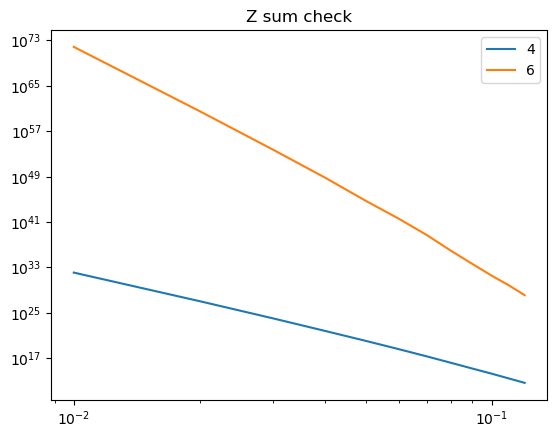

In [18]:
Z_sum_check = []

for i, p in enumerate(probabilities):
    free_energies_4 = free_energies_batch[i][0]
    free_energies_6 = free_energies_batch[i][1]
    
    j = 1

    res1 = mp.fsum([mp.exp(f_class[0][j])+ mp.exp(f_class[1][j])\
                          +mp.exp(f_class[2][j])+mp.exp(f_class[3][j]) \
                                   for f_class in free_energies_4 ])/len(free_energies_4) 
    
    res2 = mp.fsum([mp.exp(f_class[0][j])+ mp.exp(f_class[1][j])\
                          +mp.exp(f_class[2][j])+mp.exp(f_class[3][j]) \
                                   for f_class in free_energies_6 ])/len(free_energies_6) 
    Z_sum_check.append([res1,res2])
    
    
plt.figure
plt.plot(probabilities, Z_sum_check,label=["4","6"])
plt.title("Z sum check")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

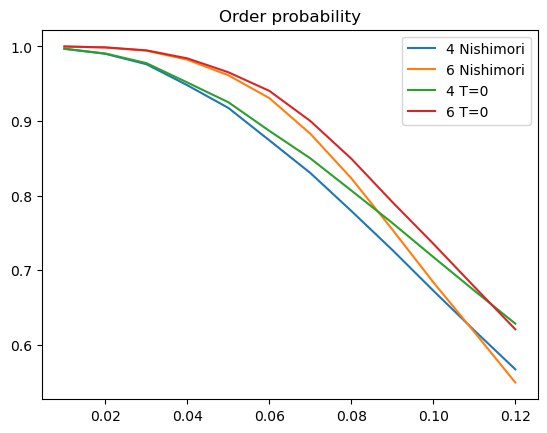

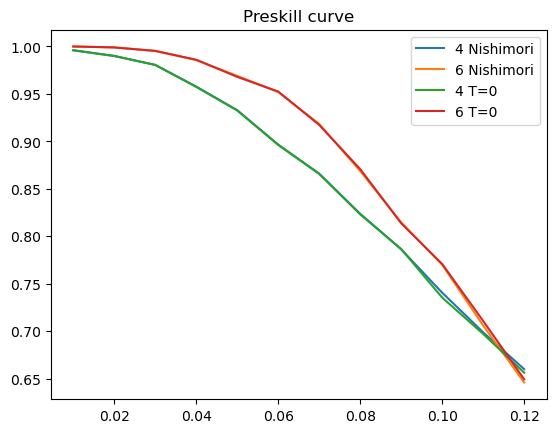

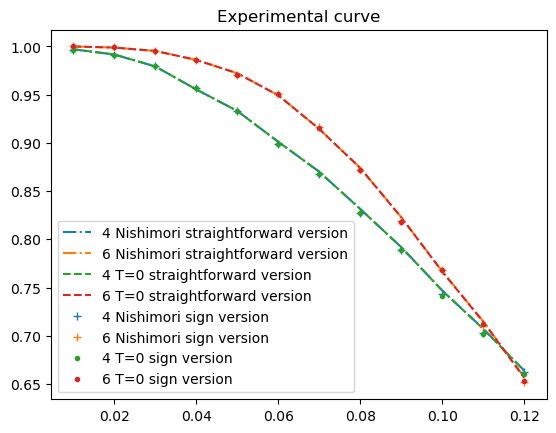

In [19]:
plt.figure
plt.plot(probabilities, order_probability,label=["4 Nishimori","6 Nishimori"])
plt.plot(probabilities, order_probability_T0,label=["4 T=0","6 T=0"])

plt.title("Order probability")
plt.legend()
plt.show()
             
plt.figure
plt.plot(probabilities, optimal_curve,label=["4 Nishimori","6 Nishimori"])
plt.plot(probabilities, mwpm_curve,label=["4 T=0","6 T=0"])

plt.title("Preskill curve")
plt.legend()
plt.show()

plt.figure
plt.plot(probabilities, experimental_curve_new,"-.",label=["4 Nishimori straightforward version","6 Nishimori straightforward version"])
plt.plot(probabilities, experimental_curve_new_T0,"--",label=["4 T=0 straightforward version","6 T=0 straightforward version"])
plt.gca().set_prop_cycle(None)
plt.plot(probabilities, experimental_curve,"+",label=["4 Nishimori sign version","6 Nishimori sign version"])
plt.plot(probabilities, experimental_curve_T0,".",label=["4 T=0 sign version","6 T=0 sign version"])


plt.title("Experimental curve")
plt.legend()
plt.show()


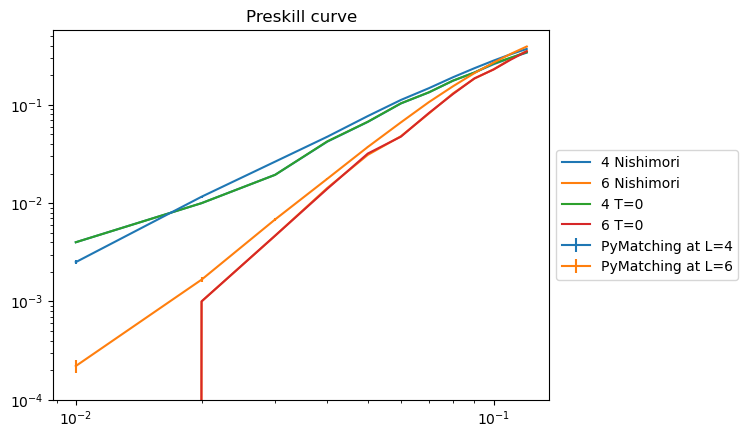

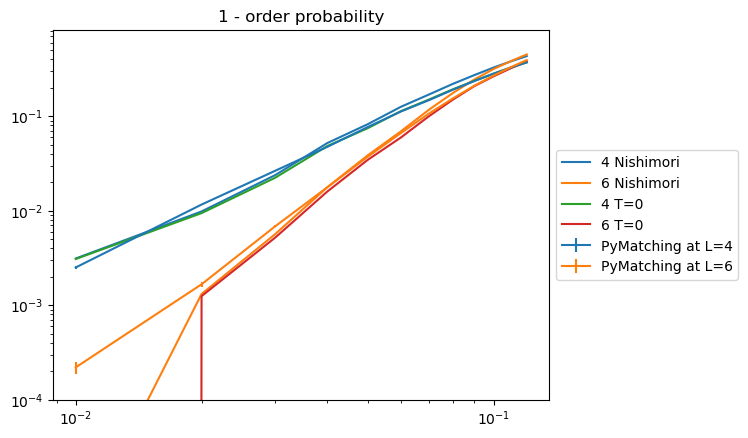

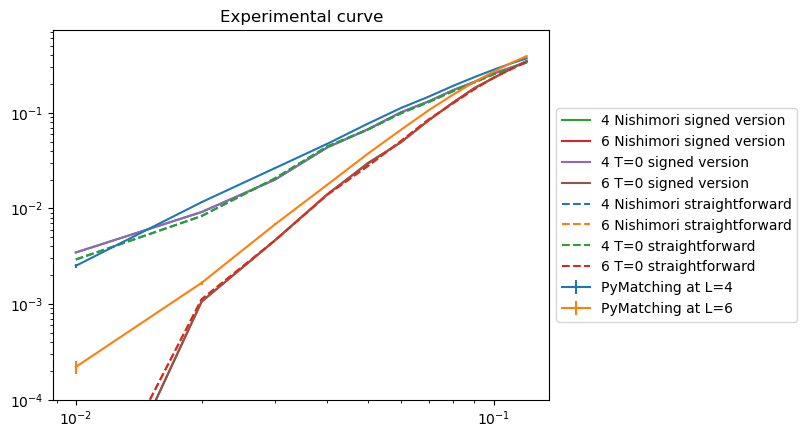

In [20]:

plt.figure

for L, logical_errors in zip(Ls, log_errors_all_L):
    std_err = (logical_errors*(1-logical_errors)/num_shots)**0.5
    plt.errorbar(ps, logical_errors, yerr=std_err, label="PyMatching at L={}".format(L))
    
plt.gca().set_prop_cycle(None)

plt.plot(probabilities, [1-optimal_curve[j][0] for j in range(len(optimal_curve))],label="4 Nishimori")
plt.plot(probabilities, [1-optimal_curve[j][1] for j in range(len(optimal_curve))],label="6 Nishimori")
plt.plot(probabilities, [1-mwpm_curve[j][0] for j in range(len(optimal_curve))], label= "4 T=0")
plt.plot(probabilities, [1-mwpm_curve[j][1] for j in range(len(optimal_curve))], label= "6 T=0")


plt.title("Preskill curve")
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(bottom=1e-4, top=None)
plt.show()



plt.figure
for L, logical_errors in zip(Ls, log_errors_all_L):
    std_err = (logical_errors*(1-logical_errors)/num_shots)**0.5
    plt.errorbar(ps, logical_errors, yerr=std_err, label="PyMatching at L={}".format(L))
    
plt.gca().set_prop_cycle(None)

    
plt.plot(probabilities, [1-order_probability[j][0] for j in range(len(order_probability))],label="4 Nishimori")
plt.plot(probabilities, [1-order_probability[j][1] for j in range(len(order_probability))],label="6 Nishimori")
plt.plot(probabilities, [1-order_probability_T0[j][0] for j in range(len(order_probability))], label = "4 T=0")
plt.plot(probabilities, [1-order_probability_T0[j][1] for j in range(len(order_probability))], label = "6 T=0")


plt.title("1 - order probability")
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(bottom=1e-4, top=None)
plt.show()


plt.figure
for L, logical_errors in zip(Ls, log_errors_all_L):
    std_err = (logical_errors*(1-logical_errors)/num_shots)**0.5
    plt.errorbar(ps, logical_errors, yerr=std_err, label="PyMatching at L={}".format(L))
    
    

plt.plot(probabilities, [1-experimental_curve[j][0] for j in range(len(experimental_curve))],label="4 Nishimori signed version")
plt.plot(probabilities, [1-experimental_curve[j][1] for j in range(len(experimental_curve))],label="6 Nishimori signed version")
plt.plot(probabilities, [1-experimental_curve_T0[j][0] for j in range(len(experimental_curve))],label="4 T=0 signed version")
plt.plot(probabilities, [1-experimental_curve_T0[j][1] for j in range(len(experimental_curve))],label="6 T=0 signed version")
plt.gca().set_prop_cycle(None)
plt.plot(probabilities, [1-experimental_curve_new[j][0] for j in range(len(experimental_curve))],"--",label="4 Nishimori straightforward")
plt.plot(probabilities, [1-experimental_curve_new[j][1] for j in range(len(experimental_curve))],"--",label="6 Nishimori straightforward")
plt.plot(probabilities, [1-experimental_curve_new_T0[j][0] for j in range(len(experimental_curve))],"--",label="4 T=0 straightforward")
plt.plot(probabilities, [1-experimental_curve_new_T0[j][1] for j in range(len(experimental_curve))],"--",label="6 T=0 straightforward")


plt.title("Experimental curve")
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(bottom=1e-4, top=None)
plt.show()


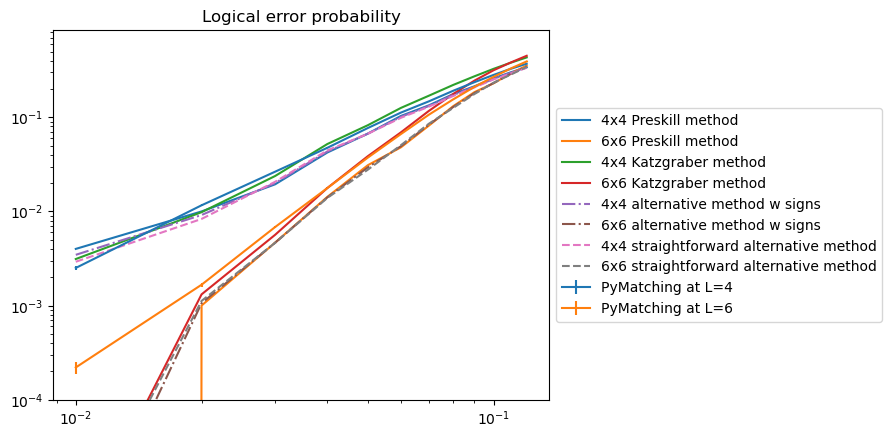

In [21]:
plt.figure


# plt.plot(probabilities, [p for p in probabilities],"--",color="black",label="Break-even")
# plt.plot(probabilities, [30*p**2 for p in probabilities],"--",color="gray",label="4 expected slope")
# plt.plot(probabilities, [150*p**3 for p in probabilities],"-.",color="gray",label="6 expected slope")


for L, logical_errors in zip(Ls, log_errors_all_L):
    std_err = (logical_errors*(1-logical_errors)/num_shots)**0.5
    plt.errorbar(ps, logical_errors, yerr=std_err, label="PyMatching at L={}".format(L))
    
plt.gca().set_prop_cycle(None)




plt.plot(probabilities, [1-optimal_curve[j][0] for j in range(len(optimal_curve))],label="4x4 Preskill method")
plt.plot(probabilities, [1-optimal_curve[j][1] for j in range(len(optimal_curve))],label="6x6 Preskill method")

#plt.gca().set_prop_cycle(None)

plt.plot(probabilities, [1-order_probability[j][0] for j in range(len(order_probability))],label="4x4 Katzgraber method")
plt.plot(probabilities, [1-order_probability[j][1] for j in range(len(order_probability))],label="6x6 Katzgraber method")

#plt.gca().set_prop_cycle(None)

plt.plot(probabilities, [1-experimental_curve[j][0] for j in range(len(experimental_curve))],'-.',label="4x4 alternative method w signs")
plt.plot(probabilities, [1-experimental_curve[j][1] for j in range(len(experimental_curve))],'-.',label="6x6 alternative method w signs")

#plt.gca().set_prop_cycle(None)

plt.plot(probabilities, [1-experimental_curve_new[j][0] for j in range(len(experimental_curve))],"--",label="4x4 straightforward alternative method")
plt.plot(probabilities, [1-experimental_curve_new[j][1] for j in range(len(experimental_curve))],"--",label="6x6 straightforward alternative method")



plt.title("Logical error probability")
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(bottom=1e-4, top=None)
plt.show()


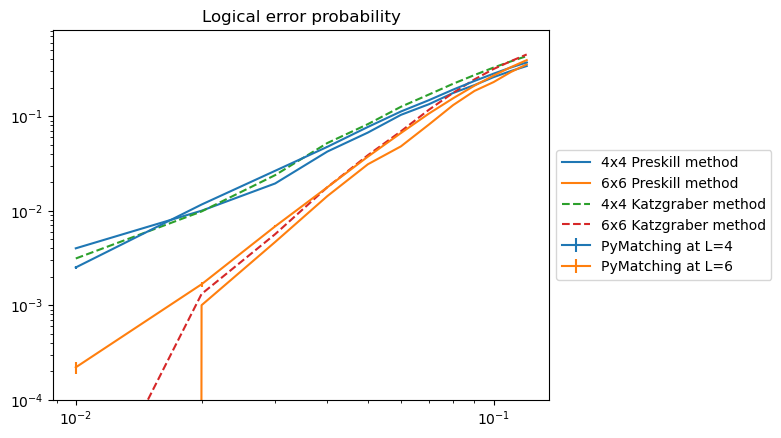

In [22]:
plt.figure


for L, logical_errors in zip(Ls, log_errors_all_L):
    std_err = (logical_errors*(1-logical_errors)/num_shots)**0.5
    plt.errorbar(ps, logical_errors, yerr=std_err, label="PyMatching at L={}".format(L))
    
plt.gca().set_prop_cycle(None)

plt.plot(probabilities, [1-optimal_curve[j][0] for j in range(len(optimal_curve))],label="4x4 Preskill method")
plt.plot(probabilities, [1-optimal_curve[j][1] for j in range(len(optimal_curve))],label="6x6 Preskill method")

plt.plot(probabilities, [1-order_probability[j][0] for j in range(len(order_probability))],"--",label="4x4 Katzgraber method")
plt.plot(probabilities, [1-order_probability[j][1] for j in range(len(order_probability))],"--",label="6x6 Katzgraber method")


plt.title("Logical error probability")
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(bottom=1e-4, top=None)
plt.show()


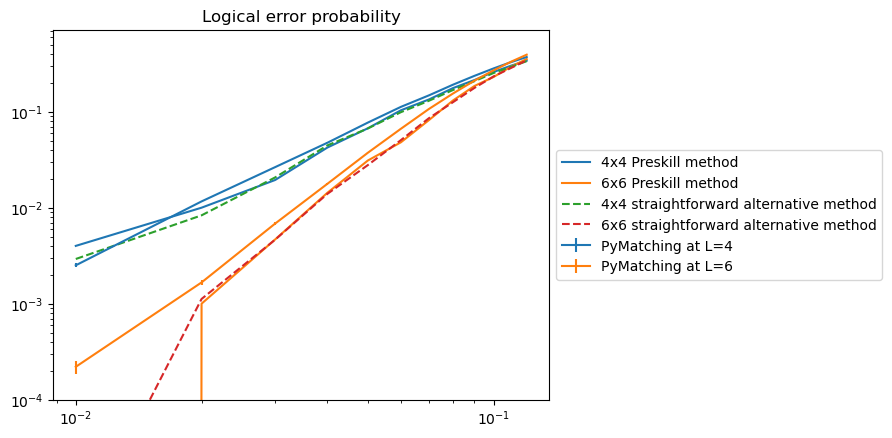

In [23]:
plt.figure


for L, logical_errors in zip(Ls, log_errors_all_L):
    std_err = (logical_errors*(1-logical_errors)/num_shots)**0.5
    plt.errorbar(ps, logical_errors, yerr=std_err, label="PyMatching at L={}".format(L))
    
plt.gca().set_prop_cycle(None)

plt.plot(probabilities, [1-optimal_curve[j][0] for j in range(len(optimal_curve))],label="4x4 Preskill method")
plt.plot(probabilities, [1-optimal_curve[j][1] for j in range(len(optimal_curve))],label="6x6 Preskill method")

plt.plot(probabilities, [1-experimental_curve_new[j][0] for j in range(len(experimental_curve))],"--",label="4x4 straightforward alternative method")
plt.plot(probabilities, [1-experimental_curve_new[j][1] for j in range(len(experimental_curve))],"--",label="6x6 straightforward alternative method")

plt.title("Logical error probability")
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(bottom=1e-4, top=None)
plt.show()

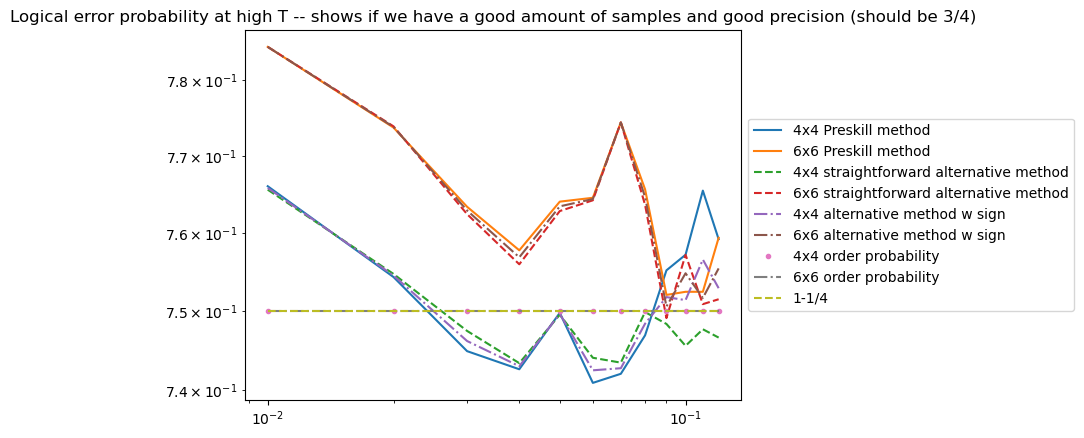

In [24]:
plt.figure


plt.gca().set_prop_cycle(None)

plt.plot(probabilities, [1-Preskill_curve_highT[j][0] for j in range(len(optimal_curve))],label="4x4 Preskill method")
plt.plot(probabilities, [1-Preskill_curve_highT[j][1] for j in range(len(optimal_curve))],label="6x6 Preskill method")

plt.plot(probabilities, [1-experimental_curve_new_highT[j][0] for j in range(len(experimental_curve))],"--",label="4x4 straightforward alternative method")
plt.plot(probabilities, [1-experimental_curve_new_highT[j][1] for j in range(len(experimental_curve))],"--",label="6x6 straightforward alternative method")



plt.plot(probabilities, [1-experimental_curve_highT[j][0] for j in range(len(experimental_curve))],"-.",label="4x4 alternative method w sign")
plt.plot(probabilities, [1-experimental_curve_highT[j][1] for j in range(len(experimental_curve))],"-.",label="6x6 alternative method w sign")


plt.plot(probabilities, [1-order_probability_highT[j][0] for j in range(len(experimental_curve))],".",label="4x4 order probability")
plt.plot(probabilities, [1-order_probability_highT[j][1] for j in range(len(experimental_curve))],"-.",label="6x6 order probability")

plt.plot(probabilities,[1-1/4 for j in range(len(probabilities))],"--", label="1-1/4")


plt.title("Logical error probability at high T -- shows if we have a good amount of samples and good precision (should be 3/4)")
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

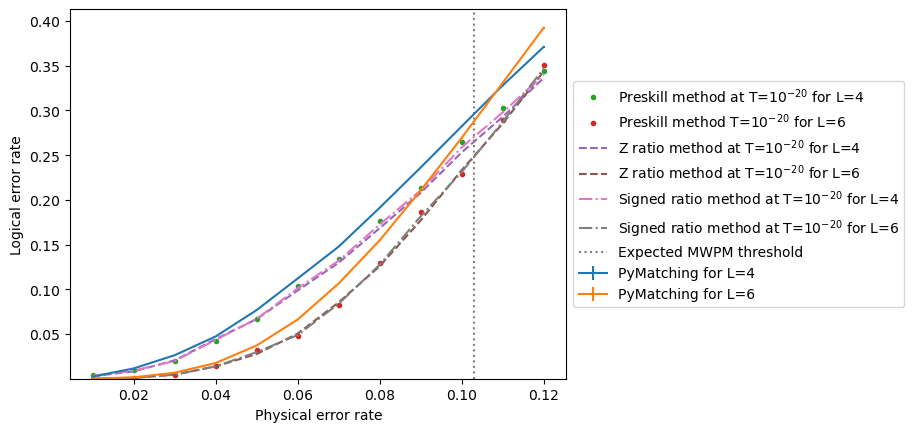

In [25]:
plt.figure()
for L, logical_errors in zip(Ls, log_errors_all_L):
    std_err = (logical_errors*(1-logical_errors)/num_shots)**0.5
    plt.errorbar(ps, logical_errors, yerr=std_err, label="PyMatching for L={}".format(L))
    
    
    
plt.plot(probabilities, [1-mwpm_curve[j][0] for j in range(len(experimental_curve))],".",label=r"Preskill method at T=$10^{-20}$ for L=4")
plt.plot(probabilities, [1-mwpm_curve[j][1] for j in range(len(experimental_curve))],".",label=r"Preskill method T=$10^{-20}$ for L=6")





plt.plot(probabilities, [1-experimental_curve_new_T0[j][0] for j in range(len(experimental_curve))],"--",label=r"Z ratio method at T=$10^{-20}$ for L=4")
plt.plot(probabilities, [1-experimental_curve_new_T0[j][1] for j in range(len(experimental_curve))],"--",label=r"Z ratio method at T=$10^{-20}$ for L=6")





plt.plot(probabilities, [1-experimental_curve_T0[j][0] for j in range(len(experimental_curve))],"-.",label=r"Signed ratio method at T=$10^{-20}$ for L=4")
plt.plot(probabilities, [1-experimental_curve_T0[j][1] for j in range(len(experimental_curve))],"-.",label=r"Signed ratio method at T=$10^{-20}$ for L=6")



plt.axvline(x=0.1031,color="gray",label="Expected MWPM threshold",linestyle="dotted")


plt.xlabel("Physical error rate")
plt.ylabel("Logical error rate")

#plt.xscale('log')
#plt.yscale('log')
plt.ylim(bottom=1e-4, top=None)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [26]:
print("Observed logical failures:")
print([float(1-mwpm_curve[j][0])*len(free_energies_batch[j][0]) for j in range(len(mwpm_curve))])
print([float(1-mwpm_curve[j][1])*len(free_energies_batch[j][0]) for j in range(len(mwpm_curve))])

print("\nSample sizes:")
print([len(free_energies_batch[j][0]) for j in range(len(mwpm_curve))])
print([len(free_energies_batch[j][1]) for j in range(len(mwpm_curve))])

Observed logical failures:
[14.0, 35.0, 68.0, 149.0, 236.00000000000003, 363.0, 470.0, 619.0, 747.0, 926.0, 1060.0, 1203.0]
[0.0, 3.5, 16.333333333333336, 49.0, 112.0, 166.25, 289.3333333333333, 452.20000000000005, 652.1666666666666, 802.1999999999999, 1012.2, 1227.3333333333335]

Sample sizes:
[3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500, 3500]
[3000, 3000, 3000, 3500, 1000, 2000, 3000, 2500, 3000, 2500, 2500, 3000]


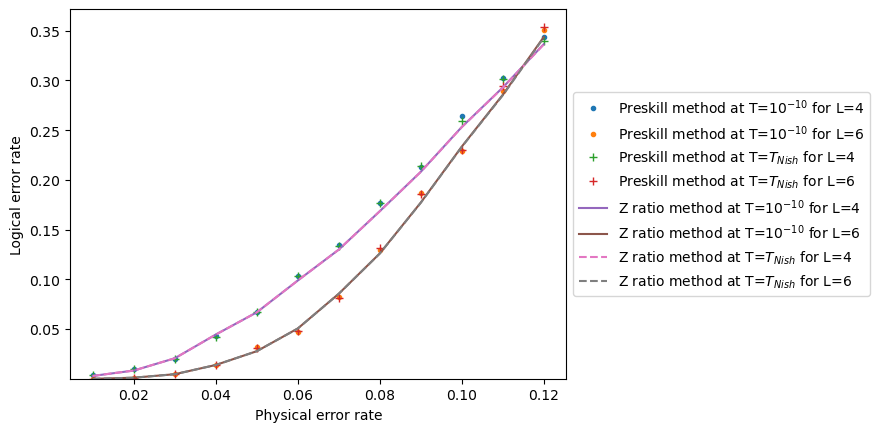

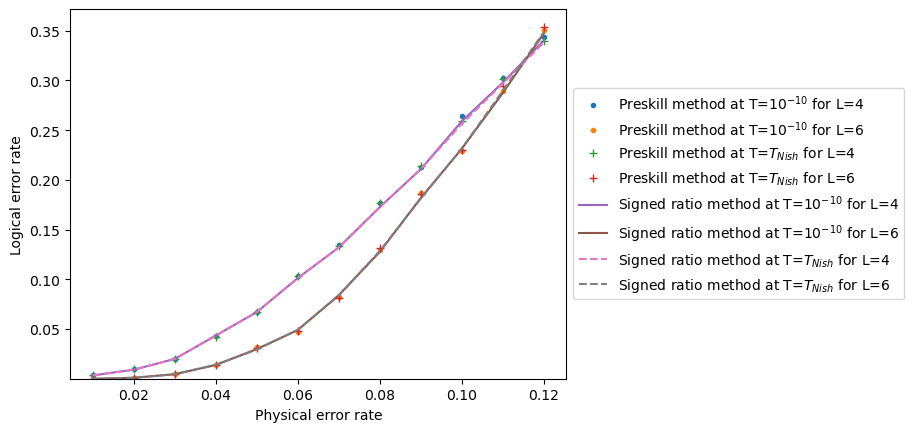

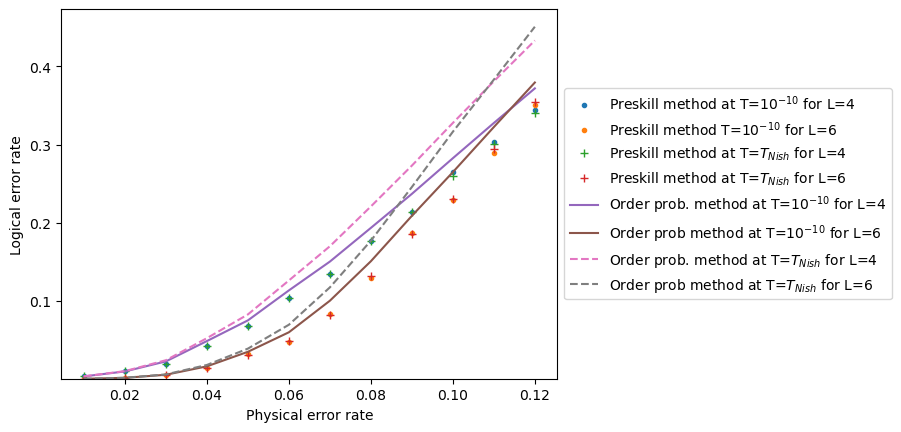

In [27]:
plt.figure()
 
plt.plot(probabilities, [1-mwpm_curve[j][0] for j in range(len(experimental_curve))],".",label=r"Preskill method at T=$10^{-10}$ for L=4")
plt.plot(probabilities, [1-mwpm_curve[j][1] for j in range(len(experimental_curve))],".",label=r"Preskill method at T=$10^{-10}$ for L=6")


plt.plot(probabilities, [1-optimal_curve[j][0] for j in range(len(experimental_curve))],"+",label=r"Preskill method at T=$T_{Nish}$ for L=4")
plt.plot(probabilities, [1-optimal_curve[j][1] for j in range(len(experimental_curve))],"+",label=r"Preskill method at T=$T_{Nish}$ for L=6")

    
plt.plot(probabilities, [1-experimental_curve_new_T0[j][0] for j in range(len(experimental_curve))],label=r"Z ratio method at T=$10^{-10}$ for L=4")
plt.plot(probabilities, [1-experimental_curve_new_T0[j][1] for j in range(len(experimental_curve))],label=r"Z ratio method at T=$10^{-10}$ for L=6")


plt.plot(probabilities, [1-experimental_curve_new[j][0] for j in range(len(experimental_curve))],"--",label=r"Z ratio method at T=$T_{Nish}$ for L=4")
plt.plot(probabilities, [1-experimental_curve_new[j][1] for j in range(len(experimental_curve))],"--",label=r"Z ratio method at T=$T_{Nish}$ for L=6")


plt.xlabel("Physical error rate")
plt.ylabel("Logical error rate")


# plt.xscale('log')
# plt.yscale('log')

plt.ylim(bottom=1e-4, top=None)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()





plt.figure()
 
plt.plot(probabilities, [1-mwpm_curve[j][0] for j in range(len(experimental_curve))],".",label=r"Preskill method at T=$10^{-10}$ for L=4")
plt.plot(probabilities, [1-mwpm_curve[j][1] for j in range(len(experimental_curve))],".",label=r"Preskill method at T=$10^{-10}$ for L=6")


plt.plot(probabilities, [1-optimal_curve[j][0] for j in range(len(experimental_curve))],"+",label=r"Preskill method at T=$T_{Nish}$ for L=4")
plt.plot(probabilities, [1-optimal_curve[j][1] for j in range(len(experimental_curve))],"+",label=r"Preskill method at T=$T_{Nish}$ for L=6")

    
plt.plot(probabilities, [1-experimental_curve_T0[j][0] for j in range(len(experimental_curve))],label=r"Signed ratio method at T=$10^{-10}$ for L=4")
plt.plot(probabilities, [1-experimental_curve_T0[j][1] for j in range(len(experimental_curve))],label=r"Signed ratio method at T=$10^{-10}$ for L=6")


plt.plot(probabilities, [1-experimental_curve[j][0] for j in range(len(experimental_curve))],"--",label=r"Signed ratio method at T=$T_{Nish}$ for L=4")
plt.plot(probabilities, [1-experimental_curve[j][1] for j in range(len(experimental_curve))],"--",label=r"Signed ratio method at T=$T_{Nish}$ for L=6")


plt.xlabel("Physical error rate")
plt.ylabel("Logical error rate")


# plt.xscale('log')
# plt.yscale('log')

plt.ylim(bottom=1e-4, top=None)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()




plt.figure()

plt.plot(probabilities, [1-mwpm_curve[j][0] for j in range(len(experimental_curve))],".",label=r"Preskill method at T=$10^{-10}$ for L=4")
plt.plot(probabilities, [1-mwpm_curve[j][1] for j in range(len(experimental_curve))],".",label=r"Preskill method T=$10^{-10}$ for L=6")

    
plt.plot(probabilities, [1-optimal_curve[j][0] for j in range(len(experimental_curve))],"+",label=r"Preskill method at T=$T_{Nish}$ for L=4")
plt.plot(probabilities, [1-optimal_curve[j][1] for j in range(len(experimental_curve))],"+",label=r"Preskill method at T=$T_{Nish}$ for L=6")


plt.plot(probabilities, [1-order_probability_T0[j][0] for j in range(len(experimental_curve))],label=r"Order prob. method at T=$10^{-10}$ for L=4")
plt.plot(probabilities, [1-order_probability_T0[j][1] for j in range(len(experimental_curve))],label=r"Order prob method at T=$10^{-10}$ for L=6")

plt.plot(probabilities, [1-order_probability[j][0] for j in range(len(experimental_curve))],"--",label=r"Order prob. method at T=$T_{Nish}$ for L=4")
plt.plot(probabilities, [1-order_probability[j][1] for j in range(len(experimental_curve))],"--",label=r"Order prob method at T=$T_{Nish}$ for L=6")

plt.xlabel("Physical error rate")
plt.ylabel("Logical error rate")

# plt.xscale('log')
# plt.yscale('log')

plt.ylim(bottom=1e-4, top=None)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Note: MWPM is actually not quite the same as setting T=0, due to energy degeneracies

In [28]:
def mwpm_result(e_class):
    #Decoder picks a class based on lowest energy
    classes = [e_class[0],e_class[1],e_class[2],e_class[3]]
    i_max = classes.index(min(classes))
    
    #if i_max is not zero, decoder fails (we encountered a configuration with higher E than lowest)
    result = 0
    if i_max == 0:
        #If it is zero, decoder may succeed, but we need to account for that there could be several equivalent choices
        #We assume that the MWPM decoder will pick among the possible classes with equal probability
        result = 1/sum([x == min(classes) for x in classes])
        
    return result

def mwpm_result_new(e_class):
    #Decoder picks a class based on lowest energy
    classes = [e_class[0],e_class[1],e_class[2],e_class[3]]
        
    #If there are multiple classes with same lowest energy, pick one at random
    #We assume MWPM would find one at random, but most likely the sparse blossom
    #would prioritize some over others, since it takes advantage of being below threshold
    indices = list(np.where(np.asarray(classes) == min(classes))[0])
    i_max = np.random.choice(indices)
    
    #if i_max is not zero, decoder fails (picked other class than we're in)
    result = 0
    if i_max == 0:
        result = 1
          
    return result




#j=1 is assumed to correspond to the Nishimori temperature
def mwpm_fraction(e_class, f_class):
    
    #Decoder picks a class based on lowest energy
    classes = [e_class[0],e_class[1],e_class[2],e_class[3]]
    i_max = classes.index(min(classes))
    
    #If there are several, decoder arbitrarily picks one at random
    indices = list(np.where(np.asarray(classes) == min(classes))[0])
    i_max = np.random.choice(indices)
    
    
    #We find the likelihood of actually being in that class
    #Here, convention is that j=1 is Nishimori, j=0 is T=0, other temperatures are j>1
    result = ((1/(mp.exp(f_class[0][1] - f_class[i_max][1])\
                  +mp.exp(f_class[1][1] - f_class[i_max][1])\
                  +mp.exp(f_class[2][1] - f_class[i_max][1])\
                  +mp.exp(f_class[3][1] - f_class[i_max][1]))))

    return result




def mwpm_result_using_degeneracy(e_class, g_class):
    #Decoder picks a class based on lowest energy
    classes = [e_class[0],e_class[1],e_class[2],e_class[3]]
        
    #If there are multiple classes with same lowest energy and degeneracy, list all
    indices = list(np.where(np.asarray(classes) == min(classes))[0])
    
    #Check among g_class for these indices which degeneracies are the largest
    g_classes = [g_class[i] for i in indices]

    
    indices2 = []
    for i in range(4):
                
        if i in indices and abs(g_class[i] - max(g_classes)) < 1e-10:
            indices2.append(i)

    if len(indices2)>1:
        print("Multiple classes with same degeneracy")
    
    #Finally pick one at random of those
    i_max = np.random.choice(indices2)
    
    #if i_max is not zero, decoder fails (picked other class than we're in)
    result = 0
    
    if i_max == 0:
        result = 1
          
    return result

new_mwpm_curve = []
new_mwpm_fraction_curve = []

mwpm_degeneracy_curve = []

for i, p in enumerate(probabilities):
    lowest_energies_4 = lowest_energies_batch[i][0]
    lowest_energies_6 = lowest_energies_batch[i][1]
    
    lowest_g_4 = lowest_g_batch[i][0]
    lowest_g_6 = lowest_g_batch[i][1]
    
    free_energies_4 = free_energies_batch[i][0]
    free_energies_6 = free_energies_batch[i][1]
    
    res1 = mp.fsum([mwpm_result(e_class) for e_class in lowest_energies_4 ])/len(lowest_energies_4) 
    res2 = mp.fsum([mwpm_result(e_class) for e_class in lowest_energies_6 ])/len(lowest_energies_6) 
    new_mwpm_curve.append([res1,res2])
    
    res1 = mp.fsum([mwpm_fraction(e_class,f_class) for e_class, f_class in zip(lowest_energies_4, free_energies_4)])/len(lowest_energies_4) 
    res2 = mp.fsum([mwpm_fraction(e_class,f_class) for e_class, f_class in zip(lowest_energies_6, free_energies_6)])/len(lowest_energies_6) 
    new_mwpm_fraction_curve.append([res1,res2])
    
    res1 = mp.fsum([mwpm_result_using_degeneracy(e_class,g_class) for e_class, g_class in zip(lowest_energies_4, lowest_g_4)])/len(lowest_energies_4) 
    res2 = mp.fsum([mwpm_result_using_degeneracy(e_class,g_class) for e_class, g_class in zip(lowest_energies_6, lowest_g_6)])/len(lowest_energies_6) 
    mwpm_degeneracy_curve.append([res1,res2])
    
    print("probability", p, "done")

probability 0.01 done
probability 0.02 done
probability 0.03 done
probability 0.04 done
probability 0.05 done
probability 0.06 done
probability 0.07 done
probability 0.08 done
probability 0.09 done
probability 0.1 done
probability 0.11 done
probability 0.12 done


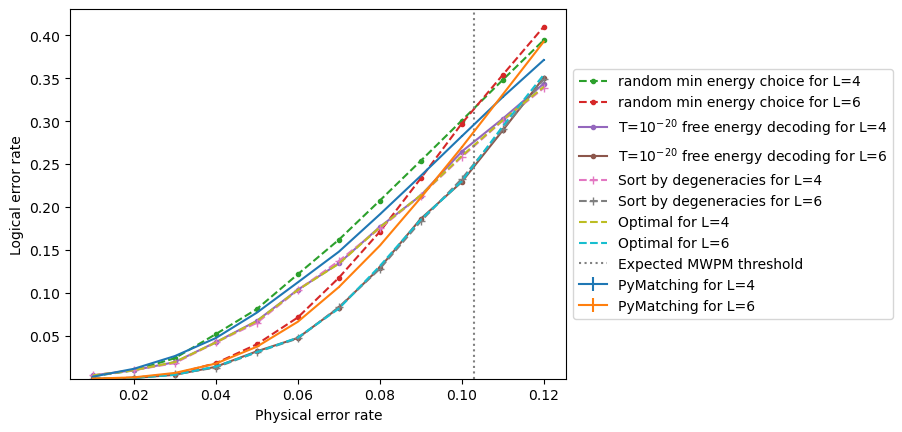

In [29]:
plt.figure()
for L, logical_errors in zip(Ls, log_errors_all_L):
    std_err = (logical_errors*(1-logical_errors)/num_shots)**0.5
    plt.errorbar(ps, logical_errors, yerr=std_err, label="PyMatching for L={}".format(L))
    
plt.plot(probabilities, [1-new_mwpm_curve[j][0] for j in range(len(experimental_curve))],".--",label=r"random min energy choice for L=4")
plt.plot(probabilities, [1-new_mwpm_curve[j][1] for j in range(len(experimental_curve))],".--",label=r"random min energy choice for L=6")


# plt.plot(probabilities, [1-new_mwpm_fraction_curve[j][0] for j in range(len(experimental_curve))],"+--",label=r"MWPM fraction for L=4")
# plt.plot(probabilities, [1-new_mwpm_fraction_curve[j][1] for j in range(len(experimental_curve))],"+--",label=r"MWPM fraction for L=6")


plt.plot(probabilities, [1-mwpm_curve[j][0] for j in range(len(experimental_curve))],".-",label=r"T=$10^{-20}$ free energy decoding for L=4")
plt.plot(probabilities, [1-mwpm_curve[j][1] for j in range(len(experimental_curve))],".-",label=r"T=$10^{-20}$ free energy decoding for L=6")


plt.plot(probabilities, [1-mwpm_degeneracy_curve[j][0] for j in range(len(experimental_curve))],"+--",label=r"Sort by degeneracies for L=4")
plt.plot(probabilities, [1-mwpm_degeneracy_curve[j][1] for j in range(len(experimental_curve))],"+--",label=r"Sort by degeneracies for L=6")




plt.plot(probabilities, [1-optimal_curve[j][0] for j in range(len(experimental_curve))],"--",label=r"Optimal for L=4")
plt.plot(probabilities, [1-optimal_curve[j][1] for j in range(len(experimental_curve))],"--",label=r"Optimal for L=6")




plt.axvline(x=0.1031,color="gray",label="Expected MWPM threshold",linestyle="dotted")

plt.xlabel("Physical error rate")
plt.ylabel("Logical error rate")

#plt.xscale('log')
#plt.yscale('log')
plt.ylim(bottom=1e-4, top=None)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [30]:
optimal_curve_comparison = []
mwpm_curve_comparison = []


for i, p in enumerate(probabilities):
    lowest_energies_4 = lowest_energies_batch[i][0]
    lowest_energies_6 = lowest_energies_batch[i][1]
    
    lowest_g_4 = lowest_g_batch[i][0]
    lowest_g_6 = lowest_g_batch[i][1]
    
    
    free_energies_4 = free_energies_batch[i][0]
    free_energies_6 = free_energies_batch[i][1]

    #Comparison curve taking <= instead of <, to see if this makes any difference
    
    j = 1
    res1 =  1 - mp.fsum([f_class[0][j] <= f_class[1][j]\
           or f_class[0][j] <= f_class[2][j]\
           or f_class[0][j] <= f_class[3][j] for f_class in free_energies_4])/(len(free_energies_4))


    res2 =  1 - mp.fsum([f_class[0][j] <= f_class[1][j]\
           or f_class[0][j] <= f_class[2][j]\
           or f_class[0][j] <= f_class[3][j] for f_class in free_energies_6])/(len(free_energies_6))

    optimal_curve_comparison.append([res1,res2])
    
    
    j = 0
    res1 =  1 - mp.fsum([f_class[0][j] <= f_class[1][j]\
           or f_class[0][j] <= f_class[2][j]\
           or f_class[0][j] <= f_class[3][j] for f_class in free_energies_4])/(len(free_energies_4))


    res2 =  1 - mp.fsum([f_class[0][j] <= f_class[1][j]\
           or f_class[0][j] <= f_class[2][j]\
           or f_class[0][j] <= f_class[3][j] for f_class in free_energies_6])/(len(free_energies_6))

    mwpm_curve_comparison.append([res1,res2])


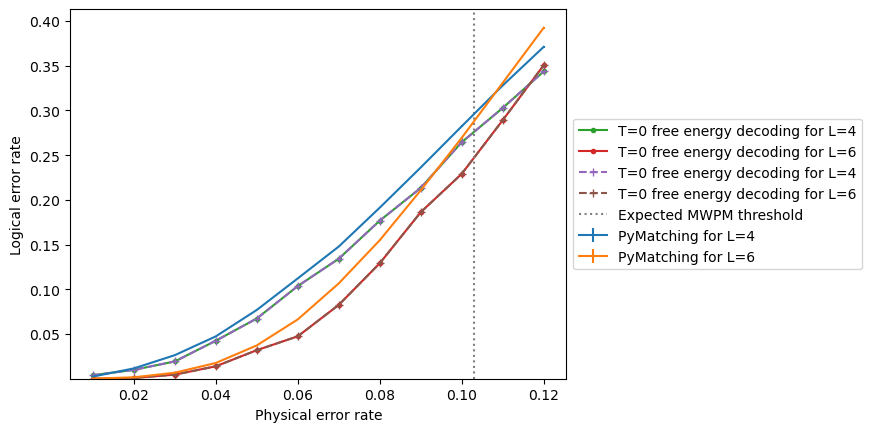

In [31]:
plt.figure()
for L, logical_errors in zip(Ls, log_errors_all_L):
    std_err = (logical_errors*(1-logical_errors)/num_shots)**0.5
    plt.errorbar(ps, logical_errors, yerr=std_err, label="PyMatching for L={}".format(L))

plt.plot(probabilities, [1-mwpm_curve[j][0] for j in range(len(experimental_curve))],".-",label=r"T=0 free energy decoding for L=4")
plt.plot(probabilities, [1-mwpm_curve[j][1] for j in range(len(experimental_curve))],".-",label=r"T=0 free energy decoding for L=6")


plt.plot(probabilities, [1-mwpm_curve_comparison[j][0] for j in range(len(experimental_curve))],"+--",label=r"T=0 free energy decoding for L=4")
plt.plot(probabilities, [1-mwpm_curve_comparison[j][1] for j in range(len(experimental_curve))],"+--",label=r"T=0 free energy decoding for L=6")




plt.axvline(x=0.1031,color="gray",label="Expected MWPM threshold",linestyle="dotted")

plt.xlabel("Physical error rate")
plt.ylabel("Logical error rate")

#plt.xscale('log')
#plt.yscale('log')
plt.ylim(bottom=1e-4, top=None)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()